# Assignment Part-I
## Advanced Regression Assignment - Surprise Housing
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file.

- The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.



### Business Goal 
- We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Observations


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# reading the dataset
data = pd.read_csv("train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# Information of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Shape

data.shape

(1460, 81)

<AxesSubplot:>

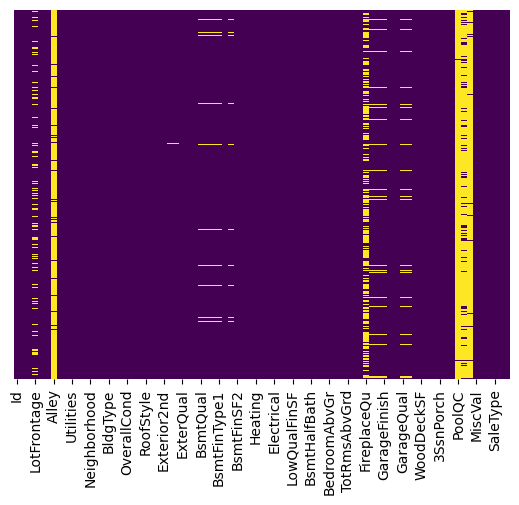

In [6]:
#plotting a heatmap on the original data to find the missing values

sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

#Observation
#Many columns are present with null values

In [7]:
# NA means absent, Replacing 'NA' by 'None'
# For this we will read the csv file again and set the parameter 'keep_default_na' to False

data = pd.read_csv('train.csv', keep_default_na=False)
data.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [8]:
# head
data.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [9]:
data[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = data[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
data.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [11]:
# Check dictionary - converting dtype of columns 'MSSubClass', 'OverallQual', 'OverallCond' to 'object'
data[['MSSubClass', 'OverallQual', 'OverallCond']] = data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [12]:
# Check dictionary - Converting columns to 'numeric'.
data['LotFrontage'] = pd.to_numeric(data['LotFrontage'], errors='coerce')
data['MasVnrArea'] = pd.to_numeric(data['MasVnrArea'], errors='coerce')

In [13]:
data[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [14]:
data_catagorical=data.select_dtypes(include=['object']).keys()
data_catagorical

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

<AxesSubplot:>

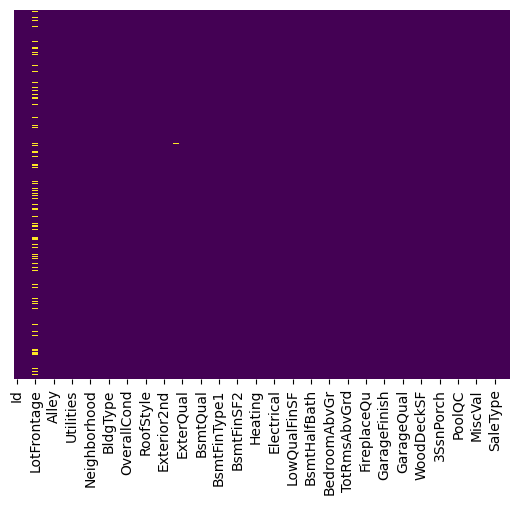

In [15]:
# Check again for NaN values
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [16]:
data.shape

(1460, 81)

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [18]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [19]:
# Need to check LotFrontage and MasVnrArea for missing values
## Replacing missing values by their means
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)



In [20]:
# Dropping ID column
data = data.drop(['Id'], axis=1)


## 2. Data cleaning [EDA]

### Outlier Treatment for numerical variable

In [21]:
# Checking Outliers

data.describe(percentiles=[0.25,0.5,0.75,1])

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000   1460.000000  1460.000000   
mean     69.863699   10516.828082  1971.267808   1984.865753   103.117123   
std      22.027677    9981.264932    30.202904     20.645407   180.731373   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      60.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      69.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      79.000000   11601.500000  2000.000000   2004.000000   164.250000   
100%    313.000000  215245.000000  2010.000000   2010.000000  1600.000000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000   
100%   5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000   
100%   2065.000000    572.000000  5642.000000      3.000000      2.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
100%      3.000000     2.000000      8.000000      3.000000     14.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014     1.767123   472.980137    94.244521    46.660274   
std       0.644666     0.747315   213.804841   125.338794    66.256028   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000   334.500000     0.000000     0.000000   
50%       1.000000     2.000000   480.000000     0.000000    25.000000   
75%       1.000000     2.000000   576.000000   168.000000    68.000000   
100%      3.000000     4.000000  1418.000000   857.000000   547.000000   
max       3.000000     4.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.75890

In [22]:
# Removing outliers using IQR [ Interquartile Range]

def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [23]:
data.shape

(1460, 80)

In [24]:
# Checking Outliers

data.describe(percentiles=[0.25,0.5,0.75,1])

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000   1460.000000  1460.000000   
mean     69.863699   10516.828082  1971.267808   1984.865753   103.117123   
std      22.027677    9981.264932    30.202904     20.645407   180.731373   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      60.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      69.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      79.000000   11601.500000  2000.000000   2004.000000   164.250000   
100%    313.000000  215245.000000  2010.000000   2010.000000  1600.000000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000   
100%   5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000   
100%   2065.000000    572.000000  5642.000000      3.000000      2.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
100%      3.000000     2.000000      8.000000      3.000000     14.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014     1.767123   472.980137    94.244521    46.660274   
std       0.644666     0.747315   213.804841   125.338794    66.256028   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000   334.500000     0.000000     0.000000   
50%       1.000000     2.000000   480.000000     0.000000    25.000000   
75%       1.000000     2.000000   576.000000   168.000000    68.000000   
100%      3.000000     4.000000  1418.000000   857.000000   547.000000   
max       3.000000     4.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.75890

### Bivariate Analysis
### Let's check correlation with numerical variables

In [25]:
# Sepreting catagorical and numeric data

data_numeric=data.select_dtypes(include=['float64', 'int64'])
data_numeric


LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0            65.0     8450       2003          2003       196.0         706   
1            80.0     9600       1976          1976         0.0         978   
2            68.0    11250       2001          2002       162.0         486   
3            60.0     9550       1915          1970         0.0         216   
4            84.0    14260       2000          2000       350.0         655   
5            85.0    14115       1993          1995         0.0         732   
6            75.0    10084       2004          2005       186.0        1369   
7            69.0    10382       1973          1973       240.0         859   
8            51.0     6120       1931          1950         0.0           0   
9            50.0     7420       1939          1950         0.0         851   
10           70.0    11200       1965          1965         0.0         906   
11           85.0    11924       2005          2006       286.0         998   
12           69.0    12968       1962          1962         0.0         737   
13           91.0    10652       2006          2007       306.0           0   
14           69.0    10920       1960          1960       212.0         733   
15           51.0     6120       1929          2001         0.0           0   
16           69.0    11241       1970          1970       180.0         578   
17           72.0    10791       1967          1967         0.0           0   
18           66.0    13695       2004          2004         0.0         646   
19           70.0     7560       1958          1965         0.0         504   
20          101.0    14215       2005          2006       380.0           0   
21           57.0     7449       1930          1950         0.0           0   
22           75.0     9742       2002          2002       281.0           0   
23           44.0     4224       1976          1976         0.0         840   
24           69.0     8246       1968          2001         0.0         188   
25          110.0    14230       2007          2007       640.0           0   
26           60.0     7200       1951          2000         0.0         234   
27           98.0    11478       2007          2008       200.0        1218   
28           47.0    16321       1957          1997         0.0        1277   
29           60.0     6324       1927          1950         0.0           0   
30           50.0     8500       1920          1950         0.0           0   
31           69.0     8544       1966          2006         0.0           0   
32           85.0    11049       2007          2007         0.0           0   
33           70.0    10552       1959          1959         0.0        1018   
34           60.0     7313       2005          2005       246.0        1153   
35          108.0    13418       2004          2005       132.0           0   
36          112.0    10859       1994          1995         0.0           0   
37           74.0     8532       1954          1990       650.0        1213   
38           68.0     7922       1953          2007         0.0         731   
39           65.0     6040       1955          1955         0.0           0   
40           84.0     8658       1965          1965       101.0         643   
41          115.0    16905       1959          1959         0.0         967   
42           69.0     9180       1983          1983         0.0         747   
43           69.0     9200       1975          1980         0.0         280   
44           70.0     7945       1959          1959         0.0         179   
45           61.0     7658       2005          2005       412.0         456   
46           48.0    12822       2003          2003         0.0        1351   
47           84.0    11096       2006          2006         0.0          24   
48           33.0     4456       1920          2008         0.0           0   
49           66.0     7742       1966          1966     

In [26]:
# correlation matrix
cor = data_numeric.corr()
cor

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage       1.000000  0.304522   0.116685      0.083348    0.178469   
LotArea           0.304522  1.000000   0.014228      0.013788    0.103321   
YearBuilt         0.116685  0.014228   1.000000      0.592855    0.311600   
YearRemodAdd      0.083348  0.013788   0.592855      1.000000    0.176529   
MasVnrArea        0.178469  0.103321   0.311600      0.176529    1.000000   
BsmtFinSF1        0.214367  0.214103   0.249503      0.128451    0.261256   
BsmtFinSF2        0.042463  0.111170  -0.049107     -0.067759   -0.071330   
BsmtUnfSF         0.124098 -0.002618   0.149040      0.181133    0.113862   
TotalBsmtSF       0.363472  0.260833   0.391452      0.291066    0.360067   
1stFlrSF          0.413773  0.299475   0.281986      0.240379    0.339850   
2ndFlrSF          0.072388  0.050986   0.010308      0.140024    0.173800   
LowQualFinSF      0.037469  0.004779  -0.183784     -0.062419   -0.068628   
GrLivArea         0.368007  0.263116   0.199010      0.287389    0.388052   
BsmtFullBath      0.090343  0.158155   0.187599      0.119470    0.083010   
BsmtHalfBath     -0.006979  0.048046  -0.038162     -0.012337    0.027403   
FullBath          0.180534  0.126031   0.468271      0.439046    0.272999   
HalfBath          0.047222  0.014259   0.242656      0.183331    0.199108   
BedroomAbvGr      0.236840  0.119690  -0.070651     -0.040581    0.102775   
KitchenAbvGr     -0.004905 -0.017784  -0.174800     -0.149598   -0.038450   
TotRmsAbvGrd      0.320518  0.190015   0.095589      0.191740    0.279568   
Fireplaces        0.233221  0.271364   0.147716      0.112581    0.247015   
GarageCars        0.269539  0.154871   0.537850      0.420622    0.361945   
GarageArea        0.323511  0.180403   0.478954      0.371600    0.370884   
WoodDeckSF        0.075542  0.171698   0.224880      0.205726    0.159991   
OpenPorchSF       0.137014  0.084774   0.188686      0.226298    0.122528   
EnclosedPorch     0.010287 -0.018340  -0.387268     -0.193919   -0.109907   
3SsnPorch         0.061945  0.020423   0.031355      0.045286    0.019144   
ScreenPorch       0.037655  0.043160  -0.050364     -0.038740    0.062248   
PoolArea          0.180819  0.077672   0.004950      0.005829    0.011928   
MiscVal          -0.000255  0.038068  -0.034383     -0.010286   -0.029512   
MoSold            0.010451  0.001205   0.012398      0.021490   -0.006723   
YrSold            0.006380 -0.014261  -0.013618      0.035743   -0.008317   
SalePrice         0.334771  0.263843   0.522897      0.507101    0.472614   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
LotFrontage      0.214367    0.042463   0.124098     0.363472  0.413773   
LotArea          0.214103    0.111170  -0.002618     0.260833  0.299475   
YearBuilt        0.249503   -0.049107   0.149040     0.391452  0.281986   
YearRemodAdd     0.128451   -0.067759   0.181133     0.291066  0.240379   
MasVnrArea       0.261256   -0.071330   0.113862     0.360067  0.339850   
BsmtFinSF1       1.000000   -0.050117  -0.495251     0.522396  0.445863   
BsmtFinSF2      -0.050117    1.000000  -0.209294     0.104810  0.097117   
BsmtUnfSF       -0.495251   -0.209294   1.000000     0.415360  0.317987   
TotalBsmtSF      0.522396    0.104810   0.415360     1.000000  0.819530   
1stFlrSF         0.445863    0.097117   0.317987     0.819530  1.000000   
2ndFlrSF        -0.137079   -0.099260   0.004469    -0.174512 -0.202646   
LowQualFinSF    -0.064503    0.014807   0.028167    -0.033245 -0.014241   
GrLivArea        0.208171   -0.009640   0.240257     0.454868  0.566024   
BsmtFullBath     0.649212    0.158678  -0.422900     0.307351  0.244671   
BsmtHalfBath     0.067418    0.070948  -0.095804    -0.000315  0.001956   
FullBath         0.058543   -0.076444   0.288886     0.323722  0.380637   
HalfBath         0.004262   -0.032148  -0.041118    -0.048804 -0.119916   
BedroomAbvGr    -0.107355   -0.015728   0.1666

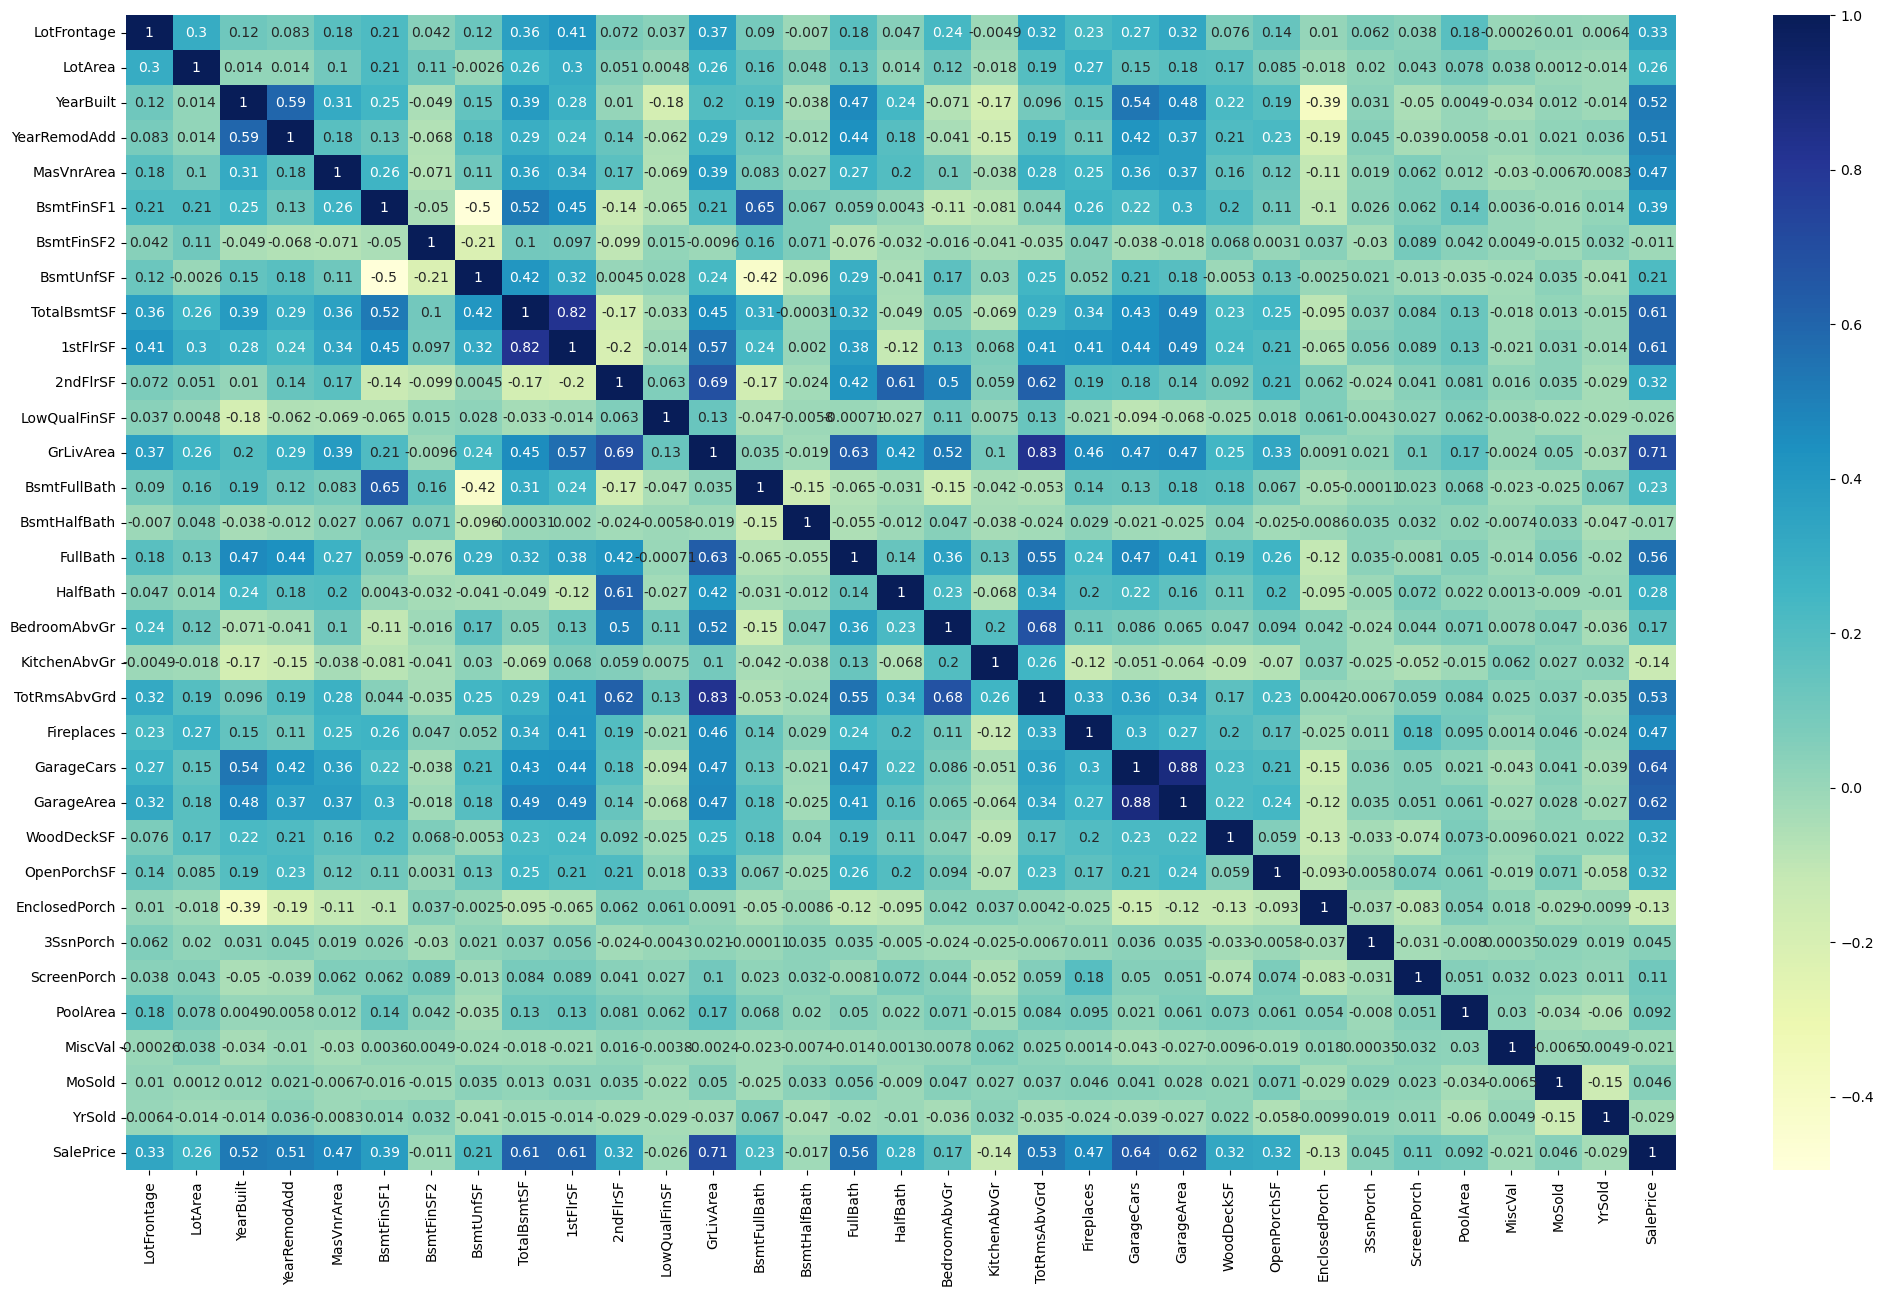

In [27]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Observations - 
GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF are highly correlated with SalePrice.



In [28]:
# Derived Variable BuiltAge from YrSold and YearBuilt.

data['BuiltAge'] = (data['YrSold'] - data['YearBuilt'])

In [29]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   
3         70       RL         60.0     9550   Pave  None      IR1         Lvl   
4         60       RL         84.0    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story           7           5       2003          2003     Gable   
1     1Story           6           8       1976          1976     Gable   
2     2Story           7           5       2001          2002     Gable   
3     2Story           7           5       1915          1970     Gable   
4     2Story           8           5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3       

In [30]:
# Now there is No use of 'YearRemodAdd' and  'MoSold'

data = data.drop(['YrSold', 'YearBuilt'], axis = 1)

data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   
3         70       RL         60.0     9550   Pave  None      IR1         Lvl   
4         60       RL         84.0    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle OverallQual OverallCond  YearRemodAdd RoofStyle RoofMatl  \
0     2Story           7           5          2003     Gable  CompShg   
1     1Story           6           8          1976     Gable  CompShg   
2     2Story           7           5          2002     Gable  CompShg   
3     2Story           7           5          1970     Gable  CompShg   
4     2Story           8           5          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd 

### Checking Outliers

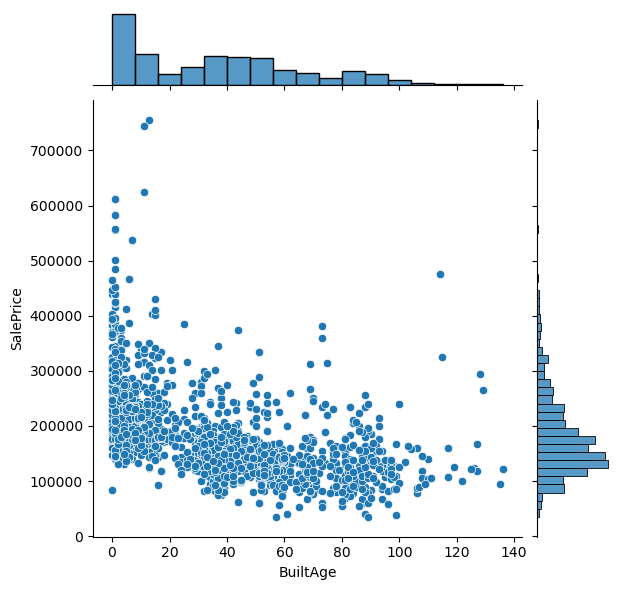

In [31]:
sns.jointplot(x='BuiltAge', y='SalePrice', data=data)

plt.show()

In [32]:
# Removing some outliers on lower right side of 'BuiltAge'
data = remove_outliers(data,'BuiltAge')

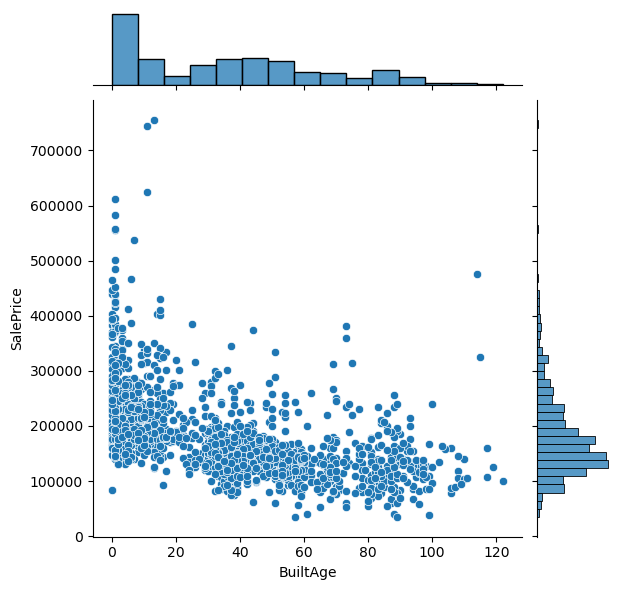

In [33]:
sns.jointplot(x='BuiltAge', y='SalePrice', data=data)

plt.show()

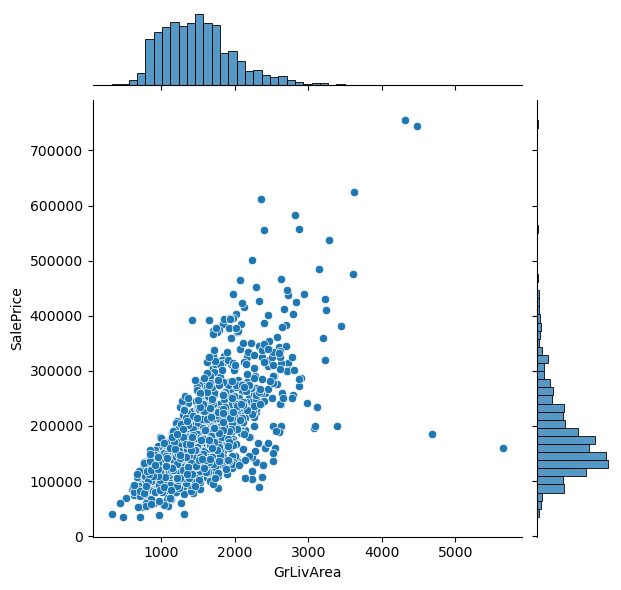

In [34]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)

plt.show()

In [35]:
# Removing some outliers on lower right side of 'GrLivArea'
data = remove_outliers(data,'GrLivArea')

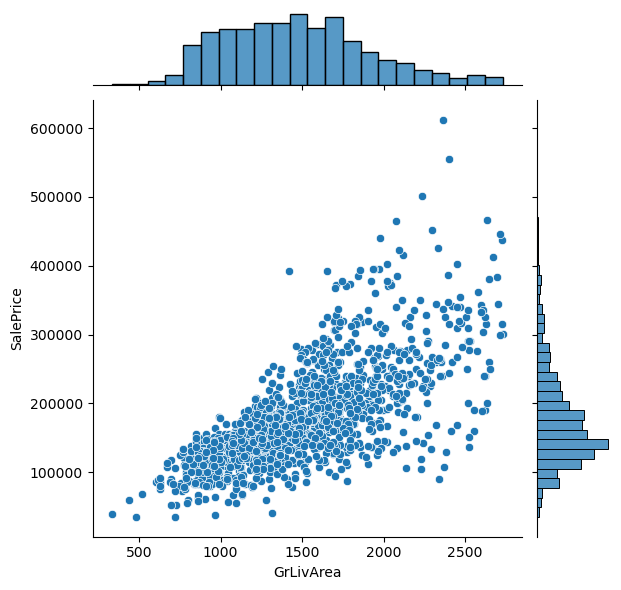

In [36]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

In [37]:
# Removing some outliers on lower right side of 'GrLivArea'
data = remove_outliers(data,'GrLivArea')

In [38]:
data.shape

(1414, 79)

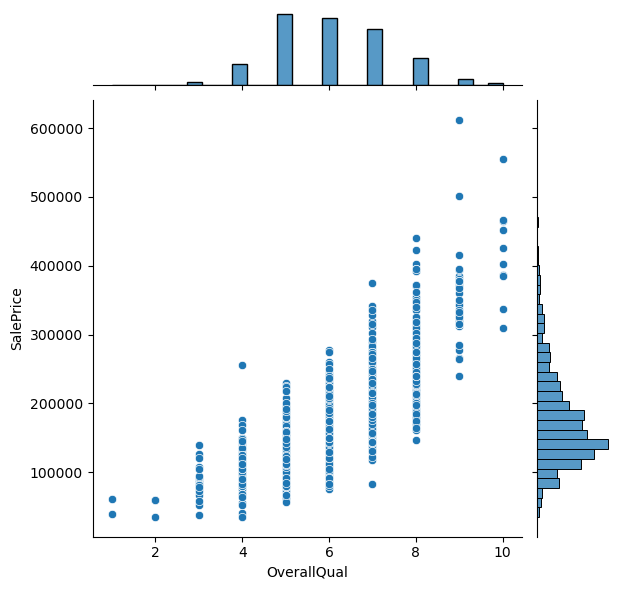

In [39]:
sns.jointplot(x='OverallQual', y='SalePrice', data=data)

plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'ClearCr'),
  Text(19, 0, 'NPkVill'),
  Text(20, 0, 'StoneBr'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

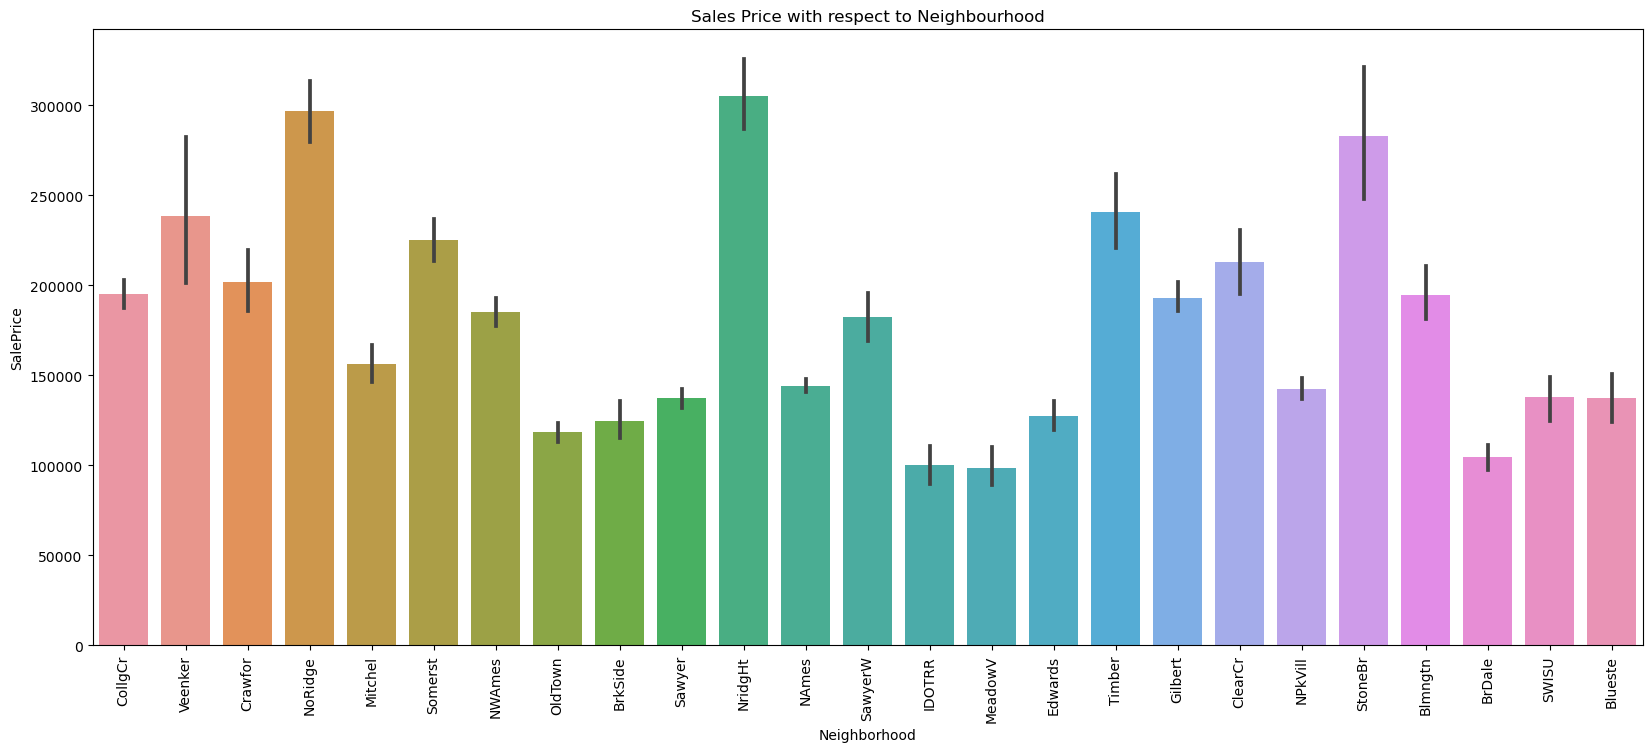

In [40]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

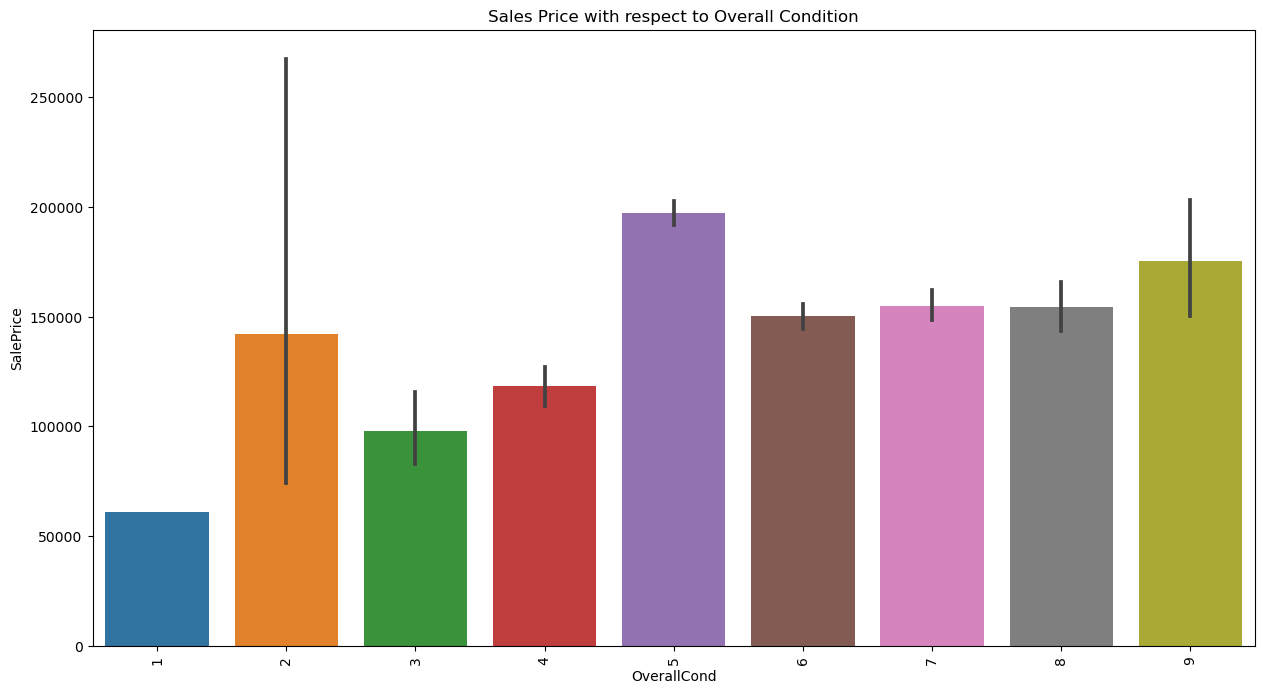

In [41]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(15, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

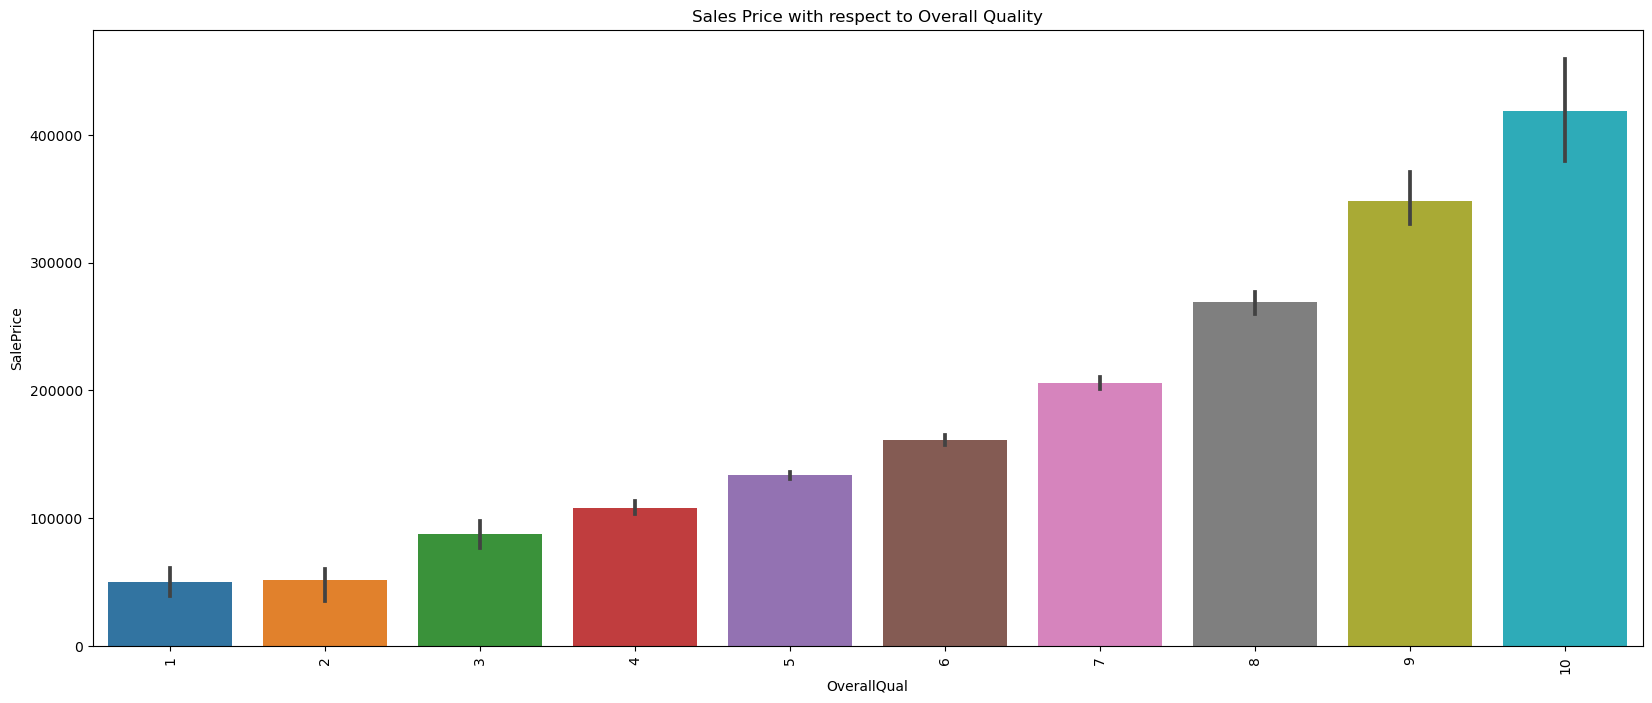

In [42]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

# Observation -
# - OverallQual increases SalePrice increases

### Checking Dependent variable - 'SalePrice' column

In [43]:
data.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      180000
67      22

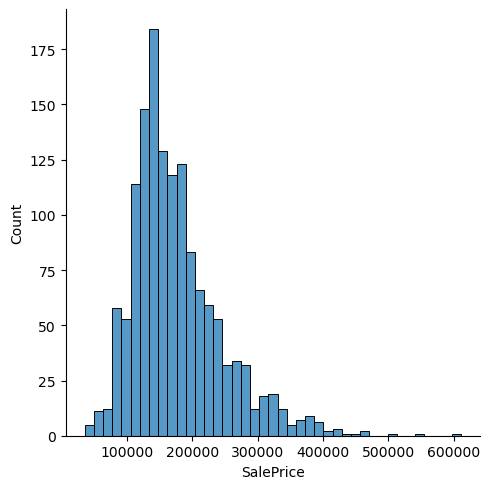

In [44]:
sns.displot(data['SalePrice'])
plt.show()

### Data is skewed, lets try to apply log transformation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

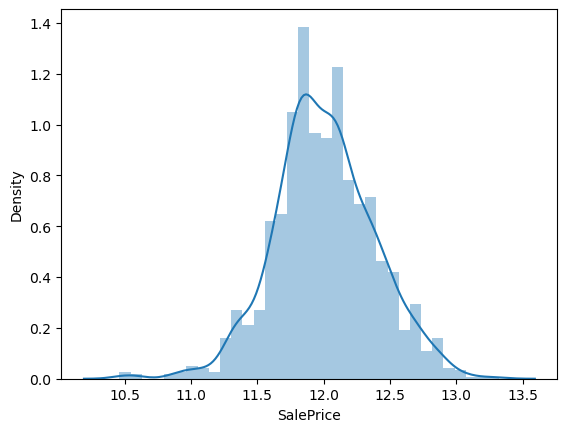

In [45]:
data['SalePrice']=np.log1p(data['SalePrice'])
sns.distplot(data['SalePrice'])

In [46]:
data.shape

(1414, 79)

## Dummy Variable Creation

In [47]:
# Selecting max null values columns for drop
data_catagorical=data.select_dtypes(include=['object'])
data_catagorical.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [48]:
data_catagorical.value_counts().sum()

1414

In [49]:
data_numeric = data.select_dtypes(include=['int64', 'float64'])
data_numeric.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2         548           0           61   
1             6           1           2         460         298            0   
2             6           1           2         608           0           42   
3             7           1           3         642           0           35   
4             9           1           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0              0          0            0         0        0       2   
1              0          0            0         0        0       5   
2              0          0            0         0        0       9   
3            272          0            0         0        0       2   
4              0          0            0         0        0      12   

   SalePrice  BuiltAge  
0  12.247699         5  
1  12.109016        31  
2  12.317171         7  
3  11.849405        91  
4  12.429220         8

In [50]:
data_cat_dum = pd.get_dummies(data_catagorical, drop_first=True)
data_cat_dum.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [51]:
data_cat_dum.shape

(1414, 349)

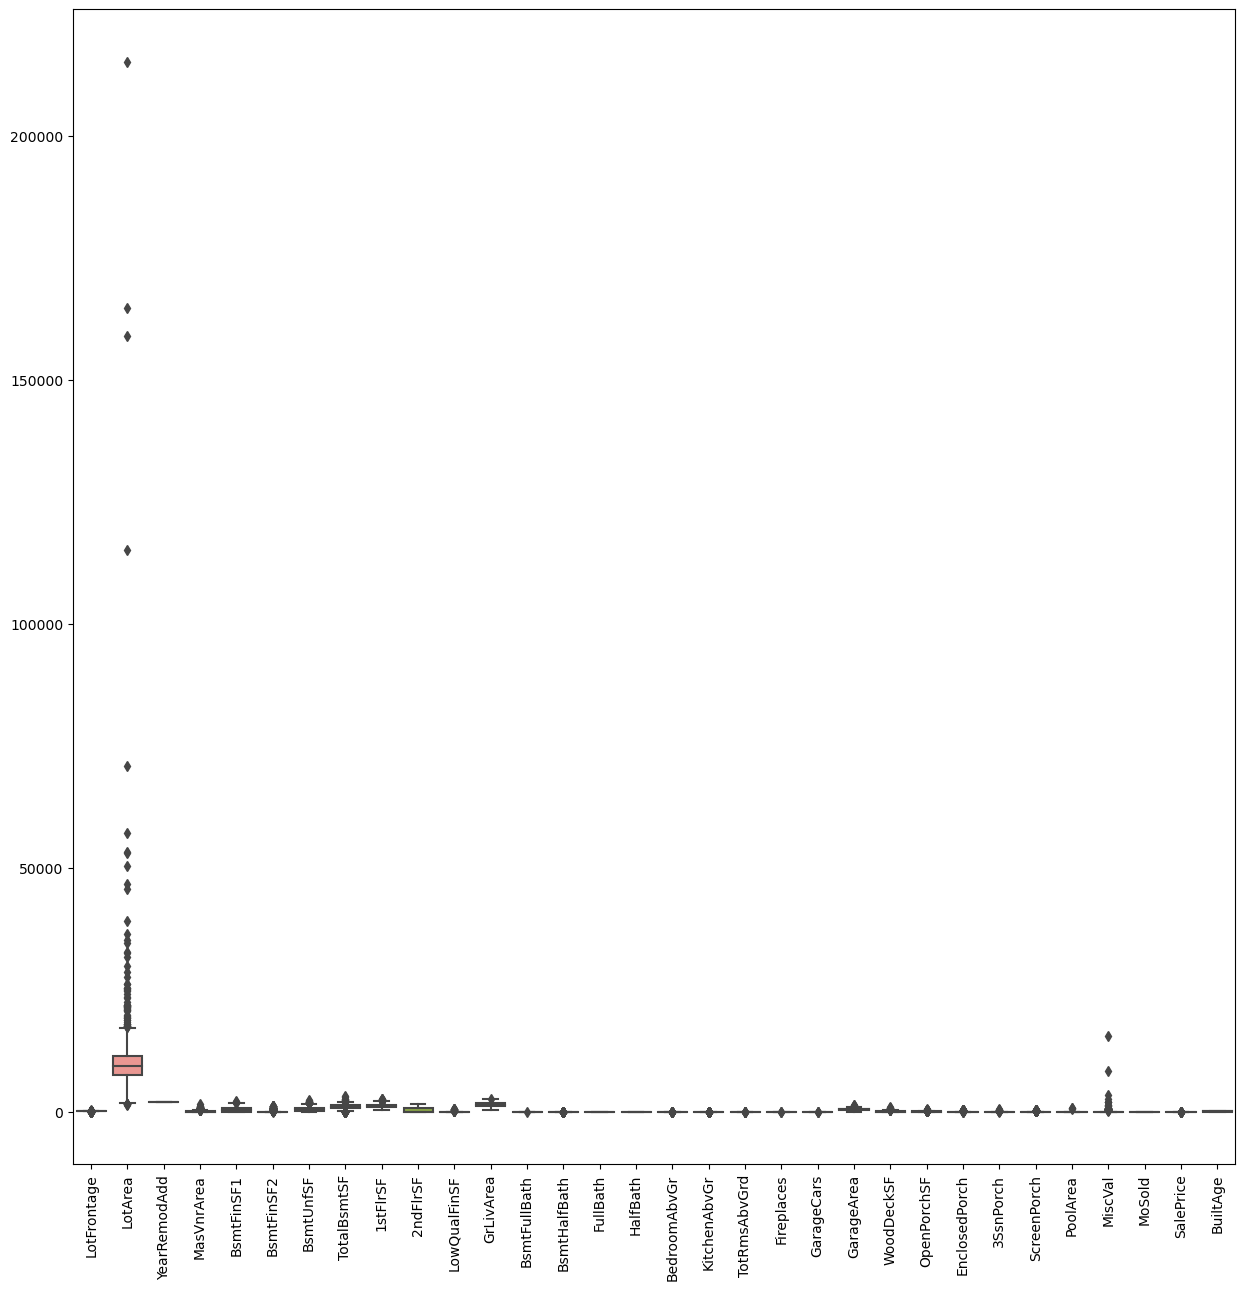

In [52]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=data_numeric);

In [53]:
# Removing outliers 5% at lower bound and 95% at upper bound
for col in data_numeric.columns:
    data_numeric[col][data_numeric[col] <= data_numeric[col].quantile(0.05)] = data_numeric[col].quantile(0.05)
    data_numeric[col][data_numeric[col] >= data_numeric[col].quantile(0.95)] = data_numeric[col].quantile(0.95)

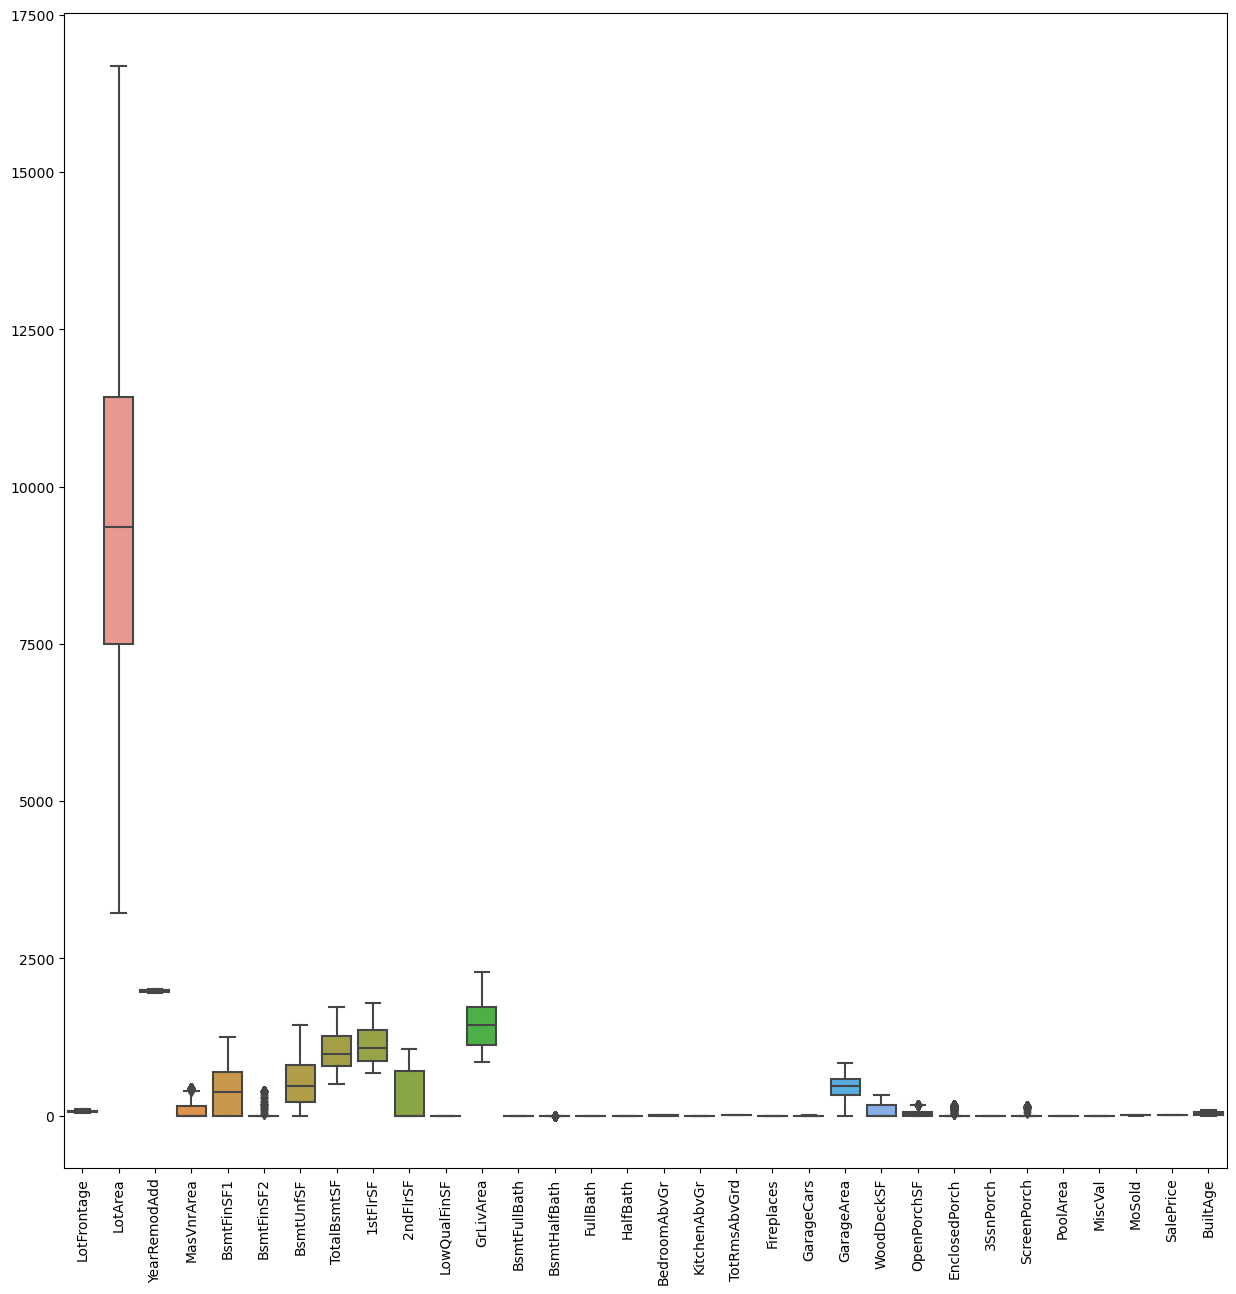

In [54]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=data_numeric);

In [55]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
data = pd.concat([data_cat_dum,data_numeric], axis=1)


## View the first few rows of our dataframe
data.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [56]:
data.shape

(1414, 381)

# Spliting into X [Independent] and y [ Dependent]

In [57]:
X = data.drop(['SalePrice'], axis=1)
X.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [58]:
y=data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

###  Spliting data in training set (70%) and test set (30%)

In [59]:
# Spliting into Train and Test dataset as 70 - 30

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =0.70 , test_size=0.30, random_state = 50)

In [60]:
X_train.head()


MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
1227              0              0              0              0   
395               0              0              0              0   
363               0              0              0              0   
1291              0              0              0              0   
801               1              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
1227              0              0              0              0   
395               0              0              0              0   
363               0              0              0              0   
1291              0              0              0              0   
801               0              0              0              0   

      MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
1227              0              0               0               0   
395               0              0               0               0   
363               0              0               0               1   
1291              0              0               0               1   
801               0              0               0               0   

      MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1227               0               0            0            0            1   
395                0               0            0            0            1   
363                0               0            0            0            0   
1291               0               0            0            0            0   
801                0               0            0            0            0   

      MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  \
1227            0            1           1           0             0   
395             0            1           1           0             0   
363             1            1           1           0             0   
1291            1            1           1           0             0   
801             1            1           1           0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1227             0             1                0                0   
395              0             1                0                0   
363              0             1                0                0   
1291             0             1                0                0   
801              0             1                0                0   

      LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
1227                1                 0                  0              0   
395                 1                 0                  0              0   
363                 1                 0                  0              0   
1291                1                 0                  0              0   
801                 1                 0                  0              0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
1227              0                 0              0              0   
395               0                 1              0              0   
363               0                 1              0              0   
1291              0                 1              0              0   
801               0                 1              0              0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1227                     0                    0                     0   
395                      0                    0                     0   
363                      0                    1                     0   
1291                     0                    1                     0   
801                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1227                     0         

In [61]:
y_train.head()

1227    11.898195
395     11.767575
363     11.678448
1291    11.691080
801     11.607335
Name: SalePrice, dtype: float64

In [62]:
print(X_train.shape)
print(y_train.shape)

(989, 380)
(989,)


In [63]:
X_test.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
1244              0              0              0              0   
649               0              0              0              0   
129               0              0              0              0   
91                0              0              0              0   
870               0              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
1244              0              1              0              0   
649               0              0              0              0   
129               0              0              0              0   
91                0              0              0              0   
870               0              0              0              0   

      MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
1244              0              0               0               0   
649               0              0               0               0   
129               0              0               0               0   
91                0              0               0               0   
870               0              0               0               0   

      MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1244               0               0            0            0            1   
649                1               0            0            0            0   
129                0               0            0            0            1   
91                 0               0            0            0            1   
870                0               0            0            0            1   

      MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  \
1244            0            1           1           0             0   
649             1            1           1           0             0   
129             0            1           1           0             0   
91              0            1           1           0             0   
870             0            1           1           0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1244             0             0                1                0   
649              0             1                0                0   
129              0             1                0                0   
91               0             1                0                0   
870              0             1                0                0   

      LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
1244                0                 0                  0              0   
649                 1                 0                  0              0   
129                 1                 0                  0              0   
91                  1                 0                  0              0   
870                 1                 0                  0              0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
1244              0                 0              1              0   
649               0                 1              0              0   
129               0                 1              0              0   
91                0                 1              0              0   
870               0                 1              0              0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1244                     0                    0                     0   
649                      0                    0                     0   
129                      0                    0                     0   
91                       0                    0                     0   
870                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1244                     0         

In [64]:
y_test.head()

1244    12.345839
649     11.383109
129     11.918397
91      11.498837
870     11.603689
Name: SalePrice, dtype: float64

In [65]:
print(X_test.shape)
print(y_test.shape)

(425, 380)
(425,)


### Applying Standard scaler to numerical columns


In [66]:
X_train_num=X_train.select_dtypes(include=['float64', 'int64']).keys()
X_train_num



Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'BuiltAge'],
      dtype='object')

In [67]:
X_test_num= X_test.select_dtypes(include=['float64', 'int64']).keys()
X_test_num

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'BuiltAge'],
      dtype='object')

In [68]:
from sklearn.preprocessing import StandardScaler


In [69]:
scaler = StandardScaler()
## Scale the numerical columns 
X_train[X_train_num] = scaler.fit_transform(X_train[X_train_num])
X_test[X_test_num] = scaler.transform(X_test[X_test_num])

In [70]:
X_train.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
1227              0              0              0              0   
395               0              0              0              0   
363               0              0              0              0   
1291              0              0              0              0   
801               1              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
1227              0              0              0              0   
395               0              0              0              0   
363               0              0              0              0   
1291              0              0              0              0   
801               0              0              0              0   

      MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
1227              0              0               0               0   
395               0              0               0               0   
363               0              0               0               1   
1291              0              0               0               1   
801               0              0               0               0   

      MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1227               0               0            0            0            1   
395                0               0            0            0            1   
363                0               0            0            0            0   
1291               0               0            0            0            0   
801                0               0            0            0            0   

      MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  \
1227            0            1           1           0             0   
395             0            1           1           0             0   
363             1            1           1           0             0   
1291            1            1           1           0             0   
801             1            1           1           0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1227             0             1                0                0   
395              0             1                0                0   
363              0             1                0                0   
1291             0             1                0                0   
801              0             1                0                0   

      LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
1227                1                 0                  0              0   
395                 1                 0                  0              0   
363                 1                 0                  0              0   
1291                1                 0                  0              0   
801                 1                 0                  0              0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
1227              0                 0              0              0   
395               0                 1              0              0   
363               0                 1              0              0   
1291              0                 1              0              0   
801               0                 1              0              0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1227                     0                    0                     0   
395                      0                    0                     0   
363                      0                    1                     0   
1291                     0                    1                     0   
801                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1227                     0         

In [71]:
X_test.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
1244              0              0              0              0   
649               0              0              0              0   
129               0              0              0              0   
91                0              0              0              0   
870               0              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
1244              0              1              0              0   
649               0              0              0              0   
129               0              0              0              0   
91                0              0              0              0   
870               0              0              0              0   

      MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
1244              0              0               0               0   
649               0              0               0               0   
129               0              0               0               0   
91                0              0               0               0   
870               0              0               0               0   

      MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1244               0               0            0            0            1   
649                1               0            0            0            0   
129                0               0            0            0            1   
91                 0               0            0            0            1   
870                0               0            0            0            1   

      MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  \
1244            0            1           1           0             0   
649             1            1           1           0             0   
129             0            1           1           0             0   
91              0            1           1           0             0   
870             0            1           1           0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1244             0             0                1                0   
649              0             1                0                0   
129              0             1                0                0   
91               0             1                0                0   
870              0             1                0                0   

      LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
1244                0                 0                  0              0   
649                 1                 0                  0              0   
129                 1                 0                  0              0   
91                  1                 0                  0              0   
870                 1                 0                  0              0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
1244              0                 0              1              0   
649               0                 1              0              0   
129               0                 1              0              0   
91                0                 1              0              0   
870               0                 1              0              0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1244                     0                    0                     0   
649                      0                    0                     0   
129                      0                    0                     0   
91                       0                    0                     0   
870                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1244                     0         

In [72]:
X_train.shape

(989, 380)

## Now the data is converted to a clean format suitable for analysis

### Checking -  RFE - Recursive feature elimination

In [73]:
# Importing RPE and LinearRegression

# Import Library

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [74]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE

rfe = RFE( lm, n_features_to_select=100)        
rfe = rfe.fit(X_train, y_train)

In [75]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass_30', False, 106),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 186),
 ('MSSubClass_60', False, 209),
 ('MSSubClass_70', False, 210),
 ('MSSubClass_75', False, 26),
 ('MSSubClass_80', False, 100),
 ('MSSubClass_85', True, 1),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 140),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', True, 1),
 ('MSSubClass_190', False, 155),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', False, 205),
 ('Alley_None', False, 211),
 ('Alley_Pave', False, 173),
 ('LotShape_IR2', False, 195),
 ('LotShape_IR3', False, 141),
 ('LotShape_Reg', False, 252),
 ('LandContour_HLS', False, 172),
 ('LandContour_Low', False, 262),
 ('LandContour_Lvl', False, 266),
 ('Utilities_NoSeWa', False, 8),
 ('LotConfig_CulDSac', False, 108),
 ('LotConfig_FR2', False, 143),
 ('LotConfig_FR3', False, 184),
 ('LotConfig_Inside', False, 185),
 ('LandS

In [76]:
# The columns which are TRUE means important 

col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['MSSubClass_40', 'MSSubClass_45', 'MSSubClass_85', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Veenker',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosN', 'Condition2_RRNn', 'BldgType_Duplex',
       'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_SFoyer',
       'OverallQual_2', 'OverallQual_4', 'OverallQual_8', 'OverallQual_9',
       'OverallCond_3', 'OverallCond_9', 'RoofStyle_Shed', 'RoofMatl_Membran',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po',
       '

In [77]:
# The columns which are FALSE means not important 
X_train.columns[~rfe.support_]

Index(['MSSubClass_30', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_120', 'MSSubClass_190',
       'Street_Pave', 'Alley_None',
       ...
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold'],
      dtype='object', length=280)

In [78]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col_rfe]

In [79]:
X_train_rfe.shape

(989, 100)

In [80]:
# Adding a constant variable
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [81]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [82]:
# Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:48:11   Log-Likelihood:                 859.07
No. Observations:                 989   AIC:                            -1540.
Df Residuals:                     900   BIC:                            -1104.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.96

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_rfe = X_train_rfe
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
50          BsmtCond_None      inf
1           MSSubClass_45      inf
26      HouseStyle_1.5Unf      inf
68        GarageType_None      inf
54      BsmtFinType2_None      inf
83         GarageYrBlt_NA      inf
53      BsmtFinType1_None      inf
84      GarageFinish_None      inf
86        GarageQual_None      inf
87          GarageQual_Po      inf
89        GarageCond_None      inf
43     Exterior2nd_CBlock      inf
35         RoofStyle_Shed      inf
48          BsmtQual_None      inf
90          GarageCond_Po      inf
37       RoofMatl_WdShake      inf
3           MSSubClass_90      inf
41     Exterior1st_CBlock      inf
25        BldgType_Duplex      inf
47           ExterCond_TA  2506.56
45           ExterCond_Gd   283.83
44           ExterCond_Fa    52.49
97  SaleCondition_Partial    25.63
94           SaleType_New    25.59
8             MSZoning_RL    24.79
9             MSZoning_RM    19.22
55           Heating_GasA    11.49
22        Condition2_Norm    10.71
63         KitchenQual_TA     8.33
21       Condition2_Feedr     8.01
6             MSZoning_FV     7.77
56           Heating_GasW     6.95
62         KitchenQual_Gd     6.87
57           Heating_Grav     5.05
46           ExterCond_Po     3.91
28      HouseStyle_SFoyer     3.88
67         Functional_Typ     3.88
15        Condition1_Norm     3.81
88          GarageQual_TA     3.80
71       GarageYrBlt_1910     3.78
51            BsmtCond_TA     3.77
24        Condition2_RRNn     3.24
2           MSSubClass_85     3.20
99               BuiltAge     2.99
58           Heating_Wall     2.78
49            BsmtCond_Gd     2.71
61         KitchenQual_Fa     2.65
14       Condition1_Feedr     2.62
7             MSZoning_RH     2.60
0           MSSubClass_40     2.48
65        Functional_Min2     2.36
64        Functional_Min1     2.33
60       Electrical_FuseP     2.30
23        Condition2_PosN     2.21
18        Condition1_RRAn     1.83
98              GrLivArea     1.78
40    Exterior1st_BrkComm     1.71
5          MSSubClass_180     1.62
4          MSSubClass_160     1.60
17        Condition1_PosN     1.58
31          OverallQual_8     1.46
32          OverallQual_9     1.45
42    Exterior2nd_Brk Cmn     1.42
59       Electrical_FuseF     1.41
33          OverallCond_3     1.40
10   Neighborhood_ClearCr     1.35
29          OverallQual_2     1.33
30          OverallQual_4     1.30
85          GarageQual_Gd     1.28
11   Neighborhood_Crawfor     1.28
52        BsmtExposure_Gd     1.24
20        Condition1_RRNn     1.23
16        Condition1_PosA     1.22
92       MiscFeature_Othr     1.21
80       GarageYrBlt_1939     1.21
27      HouseStyle_2.5Fin     1.17
75       GarageYrBlt_1931     1.16
12   Neighborhood_NoRidge     1.14
82       GarageYrBlt_2008     1.14
13   Neighborhood_Veenker     1.14
34          OverallCond_9     1.12
36       RoofMatl_Membran     1.12
70       GarageYrBlt_1908     1.11
96   SaleCondition_Family     1.10
39    Exterior1st_AsphShn     1.10
93           SaleType_Con     1.08
38       RoofMatl_WdShngl     1.08
81       GarageYrBlt_1949     1.08
66         Functional_Sev     1.08
19        Condition1_RRNe     1.07
72       GarageYrBlt_1923     1.07
78       GarageYrBlt_1935     1.06
77       GarageYrBlt_1933     1.05
76       GarageYrBlt_1932     1.05
74       GarageYrBlt_1928     1.05
79       GarageYrBlt_1936     1.04
73       GarageYrBlt_1927     1.04
95           SaleType_Oth     1.02
69       GarageYrBlt_1906     1.02
91            PoolQC_None     1.00

In [84]:
X_train.columns

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90',
       ...
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'BuiltAge'],
      dtype='object', length=380)

In [85]:
# Dropping 1st variable > VIF = 5
X_train_rfe=X_train_rfe.drop(['BsmtCond_None', 'MSSubClass_45', 'HouseStyle_1.5Unf', 'GarageType_None', 'BsmtFinType2_None', 'GarageYrBlt_NA'],axis=1)

In [86]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()



In [87]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     102.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:48:14   Log-Likelihood:                 857.60
No. Observations:                 989   AIC:                            -1539.
Df Residuals:                     901   BIC:                            -1108.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.96

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_rfe = X_train_rfe
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
41     Exterior2nd_CBlock      inf
80        GarageQual_None      inf
2           MSSubClass_90      inf
35       RoofMatl_WdShake      inf
33         RoofStyle_Shed      inf
46          BsmtQual_None      inf
50      BsmtFinType1_None      inf
24        BldgType_Duplex      inf
83        GarageCond_None      inf
39     Exterior1st_CBlock      inf
78      GarageFinish_None      inf
45           ExterCond_TA  2506.54
43           ExterCond_Gd   283.82
42           ExterCond_Fa    52.49
91  SaleCondition_Partial    25.63
88           SaleType_New    25.59
7             MSZoning_RL    24.79
8             MSZoning_RM    19.21
51           Heating_GasA    11.49
21        Condition2_Norm    10.70
59         KitchenQual_TA     8.32
20       Condition2_Feedr     8.01
5             MSZoning_FV     7.77
52           Heating_GasW     6.95
58         KitchenQual_Gd     6.87
53           Heating_Grav     5.05
81          GarageQual_Po     4.34
84          GarageCond_Po     4.25
44           ExterCond_Po     3.91
26      HouseStyle_SFoyer     3.88
63         Functional_Typ     3.88
82          GarageQual_TA     3.79
14        Condition1_Norm     3.78
48            BsmtCond_TA     3.76
66       GarageYrBlt_1910     3.62
23        Condition2_RRNn     3.24
1           MSSubClass_85     3.20
93               BuiltAge     2.99
54           Heating_Wall     2.78
47            BsmtCond_Gd     2.71
57         KitchenQual_Fa     2.64
13       Condition1_Feedr     2.60
6             MSZoning_RH     2.59
0           MSSubClass_40     2.48
61        Functional_Min2     2.36
60        Functional_Min1     2.33
56       Electrical_FuseP     2.30
22        Condition2_PosN     2.21
17        Condition1_RRAn     1.82
92              GrLivArea     1.76
38    Exterior1st_BrkComm     1.71
4          MSSubClass_180     1.62
3          MSSubClass_160     1.59
16        Condition1_PosN     1.58
29          OverallQual_8     1.46
30          OverallQual_9     1.45
40    Exterior2nd_Brk Cmn     1.42
55       Electrical_FuseF     1.40
31          OverallCond_3     1.39
9    Neighborhood_ClearCr     1.35
27          OverallQual_2     1.32
28          OverallQual_4     1.30
10   Neighborhood_Crawfor     1.28
79          GarageQual_Gd     1.28
49        BsmtExposure_Gd     1.24
19        Condition1_RRNn     1.23
15        Condition1_PosA     1.22
86       MiscFeature_Othr     1.21
75       GarageYrBlt_1939     1.21
25      HouseStyle_2.5Fin     1.17
70       GarageYrBlt_1931     1.16
11   Neighborhood_NoRidge     1.14
77       GarageYrBlt_2008     1.14
12   Neighborhood_Veenker     1.14
34       RoofMatl_Membran     1.12
32          OverallCond_9     1.12
65       GarageYrBlt_1908     1.11
37    Exterior1st_AsphShn     1.10
90   SaleCondition_Family     1.10
62         Functional_Sev     1.08
36       RoofMatl_WdShngl     1.08
87           SaleType_Con     1.08
76       GarageYrBlt_1949     1.08
67       GarageYrBlt_1923     1.07
18        Condition1_RRNe     1.07
73       GarageYrBlt_1935     1.06
72       GarageYrBlt_1933     1.05
71       GarageYrBlt_1932     1.05
69       GarageYrBlt_1928     1.05
68       GarageYrBlt_1927     1.04
74       GarageYrBlt_1936     1.04
64       GarageYrBlt_1906     1.02
89           SaleType_Oth     1.02
85            PoolQC_None     1.00

In [89]:
# Dropping 1st variable > VIF = 5

X_train_rfe=X_train_rfe.drop(['Exterior2nd_CBlock', 'GarageQual_None', 'MSSubClass_90', 'RoofMatl_WdShake', 'RoofStyle_Shed', 'BsmtQual_None', 'BsmtFinType1_None', 'BldgType_Duplex', 'GarageCond_None', 'Exterior1st_CBlock', 'GarageFinish_None','ExterCond_TA'], axis=1)

In [90]:
import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     100.1
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:48:17   Log-Likelihood:                 818.40
No. Observations:                 989   AIC:                            -1471.
Df Residuals:                     906   BIC:                            -1064.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.22

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_rfe = X_train_rfe
vif['Features'] = X_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
20        Condition2_Norm  669.30
73            PoolQC_None  639.60
42           Heating_GasA  409.07
6             MSZoning_RL  106.86
54         Functional_Typ   54.64
79  SaleCondition_Partial   27.84
76           SaleType_New   27.70
13        Condition1_Norm   27.24
40            BsmtCond_TA   23.06
7             MSZoning_RM   21.25
50         KitchenQual_TA   16.64
71          GarageQual_TA   16.60
49         KitchenQual_Gd   11.28
4             MSZoning_FV    7.72
43           Heating_GasW    5.75
19       Condition2_Feedr    5.46
44           Heating_Grav    4.39
70          GarageQual_Po    4.35
72          GarageCond_Po    4.13
57       GarageYrBlt_1910    3.57
24      HouseStyle_SFoyer    3.45
1           MSSubClass_85    2.92
81               BuiltAge    2.90
48         KitchenQual_Fa    2.69
12       Condition1_Feedr    2.67
5             MSZoning_RH    2.53
22        Condition2_RRNn    2.51
45           Heating_Wall    2.40
52        Functional_Min2    2.36
51        Functional_Min1    2.35
39            BsmtCond_Gd    2.19
47       Electrical_FuseP    2.18
16        Condition1_RRAn    1.83
21        Condition2_PosN    1.79
80              GrLivArea    1.69
2          MSSubClass_160    1.67
34    Exterior1st_BrkComm    1.67
27          OverallQual_8    1.62
15        Condition1_PosN    1.58
3          MSSubClass_180    1.53
36           ExterCond_Fa    1.52
28          OverallQual_9    1.47
35    Exterior2nd_Brk Cmn    1.43
46       Electrical_FuseF    1.42
29          OverallCond_3    1.39
26          OverallQual_4    1.37
41        BsmtExposure_Gd    1.35
8    Neighborhood_ClearCr    1.35
37           ExterCond_Gd    1.33
9    Neighborhood_Crawfor    1.31
25          OverallQual_2    1.31
14        Condition1_PosA    1.22
66       GarageYrBlt_1939    1.22
18        Condition1_RRNn    1.21
23      HouseStyle_2.5Fin    1.17
10   Neighborhood_NoRidge    1.16
74       MiscFeature_Othr    1.16
68       GarageYrBlt_2008    1.16
0           MSSubClass_40    1.15
11   Neighborhood_Veenker    1.15
69          GarageQual_Gd    1.14
38           ExterCond_Po    1.13
30          OverallCond_9    1.13
31       RoofMatl_Membran    1.12
78   SaleCondition_Family    1.11
61       GarageYrBlt_1931    1.11
56       GarageYrBlt_1908    1.09
53         Functional_Sev    1.08
75           SaleType_Con    1.08
32       RoofMatl_WdShngl    1.08
67       GarageYrBlt_1949    1.07
58       GarageYrBlt_1923    1.07
17        Condition1_RRNe    1.07
64       GarageYrBlt_1935    1.06
60       GarageYrBlt_1928    1.05
33    Exterior1st_AsphShn    1.05
65       GarageYrBlt_1936    1.04
59       GarageYrBlt_1927    1.04
62       GarageYrBlt_1932    1.03
63       GarageYrBlt_1933    1.03
77           SaleType_Oth    1.02
55       GarageYrBlt_1906    1.02

### RFE Observations - 
#### By RFE method R - Squared = 0.901

# Now lets check by Lasso and Ridge Regression

###  Ridge Regression

In [92]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Optimal value of alpha
ridgeCV.best_params_

{'alpha': 9.0}

In [94]:
# Cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.05650315, 0.05464215, 0.04200411, 0.04219871, 0.04480114,
        0.04459987, 0.04399948, 0.04219856, 0.04119797, 0.03999963,
        0.04160023, 0.04139791, 0.04419904, 0.0425982 , 0.04260077,
        0.04520135, 0.04620166, 0.03739915, 0.0428009 , 0.04560308,
        0.04420004, 0.04359918, 0.03899913, 0.0454    , 0.04779897,
        0.04279747, 0.04019918, 0.03960109]),
 'std_fit_time': array([0.00433459, 0.01467482, 0.00322804, 0.00354667, 0.00770429,
        0.00205745, 0.00789948, 0.00499518, 0.0034284 , 0.0020953 ,
        0.00402915, 0.00571553, 0.00425976, 0.00471581, 0.00535077,
        0.00453267, 0.00222755, 0.00257653, 0.00444475, 0.00224678,
        0.00239857, 0.00332513, 0.00610098, 0.00417755, 0.00996799,
        0.00354553, 0.00439975, 0.00403804]),
 'mean_score_time': array([0.01039762, 0.01220031, 0.00939684, 0.00980015, 0.01220102,
        0.01319852, 0.00960059, 0.01259995, 0.00919962, 0.00919547,
        0.00920019, 0.01180744, 0.011603

###  We got alpha value as 9.0, Building Ridge Regression model for alpha 9.0

In [95]:
ridge = Ridge(alpha=9)

In [96]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=9)

In [97]:
# Ridge regression coefficient
ridge.coef_

array([-3.23261685e-02, -2.51041867e-03, -5.55915233e-03, -1.02088599e-03,
       -6.24249566e-03,  3.98708660e-02,  1.55770749e-02, -3.53045521e-03,
        4.97744739e-03, -2.99001355e-02,  2.06846439e-02, -4.22422908e-02,
       -2.30300064e-02, -1.20659304e-02,  4.81637973e-02,  1.56010886e-02,
        3.56629041e-02, -1.31831544e-02,  1.50169798e-02, -2.01175792e-03,
        1.26345419e-02,  1.09837295e-02, -6.85637689e-03,  9.25479550e-04,
       -6.98144810e-03, -5.10402370e-03, -3.89805977e-04, -1.24775114e-02,
        2.87727033e-02, -1.52154835e-02,  2.99470166e-03, -6.63794491e-03,
        1.24077401e-02, -1.26613171e-02,  3.43710049e-03, -2.26574623e-03,
        4.10152017e-02,  3.05510322e-02, -2.17959849e-02,  9.55211980e-02,
       -4.31805392e-02, -1.69329392e-02, -2.03162228e-02, -6.78886769e-02,
       -2.22672600e-02, -2.80573308e-02,  7.31056551e-03, -1.90777619e-02,
        2.38858596e-02,  2.52630772e-02, -1.99699492e-02,  2.83300176e-03,
       -2.90156688e-02, -

In [98]:
# Predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [99]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints metrics - 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [100]:
# Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.95
R-Squared (Test) = 0.92
RSS (Train) = 5.95
RSS (Test) = 4.03
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.10


In [101]:
# Dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.056503      0.004335         0.010398        0.000491      0.0001   
1        0.054642      0.014675         0.012200        0.003654       0.001   
2        0.042004      0.003228         0.009397        0.002333        0.01   
3        0.042199      0.003547         0.009800        0.000748        0.05   
4        0.044801      0.007704         0.012201        0.002923         0.1   
5        0.044600      0.002057         0.013199        0.004263         0.2   
6        0.043999      0.007899         0.009601        0.000799         0.3   
7        0.042199      0.004995         0.012600        0.006773         0.4   
8        0.041198      0.003428         0.009200        0.000400         0.5   
9        0.040000      0.002095         0.009195        0.000753         0.6   
10       0.041600      0.004029         0.009200        0.001599         0.7   
11       0.041398      0.005716         0.011807        0.003433         0.8   
12       0.044199      0.004260         0.011603        0.002332         0.9   
13       0.042598      0.004716         0.008998        0.000893         1.0   
14       0.042601      0.005351         0.011000        0.001267         2.0   
15       0.045201      0.004533         0.010597        0.002726         3.0   
16       0.046202      0.002228         0.008598        0.001199         4.0   
17       0.037399      0.002577         0.009403        0.000800         5.0   
18       0.042801      0.004445         0.010400        0.002419         6.0   
19       0.045603      0.002247         0.009197        0.001168         7.0   
20       0.044200      0.002399         0.008597        0.001500         8.0   
21       0.043599      0.003325         0.008601        0.001204         9.0   
22       0.038999      0.006101         0.008998        0.001261        10.0   
23       0.045400      0.004178         0.011600        0.006216          20   
24       0.047799      0.009968         0.010398        0.004318          50   
25       0.042797      0.003546         0.011605        0.002799         100   
26       0.040199      0.004400         0.010002        0.001094         500   
27       0.039601      0.004038         0.005596        0.001191        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.095927          -0.092432   
1    {'alpha': 0.001}          -0.095325          -0.090788   
2     {'alpha': 0.01}          -0.094605          -0.089345   
3     {'alpha': 0.05}          -0.092282          -0.088317   
4      {'alpha': 0.1}          -0.090070          -0.087232   
5      {'alpha': 0.2}          -0.086925          -0.085521   
6      {'alpha': 0.3}          -0.084713          -0.084204   
7      {'alpha': 0.4}          -0.082984          -0.083166   
8      {'alpha': 0.5}          -0.081567          -0.082369   
9      {'alpha': 0.6}          -0.080440          -0.081661   
10     {'alpha': 0.7}          -0.079476          -0.081025   
11     {'alpha': 0.8}          -0.078633          -0.080458   
12     {'alpha': 0.9}          -0.077888          -0.079938   
13     {'alpha': 1.0}          -0.077236          -0.079463   
14     {'alpha': 2.0}          -0.073155          -0.076129   
15     {'alpha': 3.0}          -0.071177          -0.074548   
16     {'alpha': 4.0}          -0.070157          -0.073634   
17     {'alpha': 5.0}          -0.069754          -0.072919   
18     {'alpha': 6.0}          -0.069606          -0.072356   
19     {'alpha': 7.0}          -0.069562          -0.071900   
20     {'alpha': 8.0}          -0.069554          -0.071543   
21     {'alpha': 9.0}          -0.069607          -0.071226   
22    {'alpha': 10.0}          -0.069712          -0.070994   
23      {'alpha': 20}          -0.071237          -0.070599   
24      {'alpha': 50}          -0.075273          -0.073315   
25     {'alpha': 100}          -0.078940     

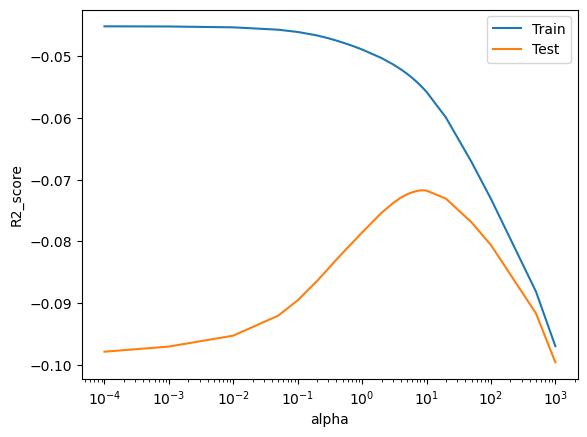

In [102]:
# Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### Ridge Regression model -> As per graph, Optimal value of alpha is 9.

## Lasso Regression Model

In [103]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
# Optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [105]:
# Cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.34060669, 0.19436612, 0.05959897, 0.05059223, 0.03953848,
        0.03160715, 0.03768406, 0.03112521, 0.03299966, 0.03219819,
        0.03100185, 0.02880044, 0.03319788, 0.03436956, 0.03309665,
        0.02781019, 0.03203964, 0.03139849, 0.02979598, 0.02940321,
        0.03124061, 0.03008742, 0.03180313, 0.03479962, 0.03256574,
        0.02903438, 0.03241773, 0.02860012]),
 'std_fit_time': array([0.07135643, 0.04877648, 0.00768282, 0.00983151, 0.0083806 ,
        0.0045036 , 0.00884553, 0.00396136, 0.00477678, 0.00591497,
        0.0043798 , 0.00271387, 0.00354305, 0.00599698, 0.00602063,
        0.00323795, 0.00619169, 0.00436499, 0.00376392, 0.00224301,
        0.00621461, 0.00320684, 0.0086573 , 0.00545354, 0.00401507,
        0.00078696, 0.00812917, 0.00215326]),
 'mean_score_time': array([0.0113235 , 0.01480284, 0.00960298, 0.01303287, 0.00840173,
        0.00899038, 0.00859933, 0.0123888 , 0.01359859, 0.00939865,
        0.00839887, 0.01201015, 0.010595

### We got alpha value as 0.001, Building Lasso Regression model for alpha 0.001.

In [106]:
lasso = Lasso(alpha=0.001)

In [107]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [108]:
lasso.coef_

array([-1.20594003e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.97564126e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.58529984e-02,  1.67526230e-02, -1.47962490e-02,
       -0.00000000e+00, -0.00000000e+00,  1.97729820e-02,  0.00000000e+00,
        1.51407683e-02, -3.22208864e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -3.71495978e-04,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.78791899e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.63498770e-02,  1.53734136e-02, -0.00000000e+00,  1.10536385e-01,
       -2.46839076e-02, -0.00000000e+00, -0.00000000e+00, -3.80658306e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.38814659e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [109]:
# Predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [110]:
# Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.92
RSS (Train) = 8.10
RSS (Test) = 4.17
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [111]:
# Dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.340607      0.071356         0.011323    1.575540e-03      0.0001   
1        0.194366      0.048776         0.014803    1.112268e-02       0.001   
2        0.059599      0.007683         0.009603    4.899440e-04        0.01   
3        0.050592      0.009832         0.013033    6.752336e-03        0.05   
4        0.039538      0.008381         0.008402    8.023015e-04         0.1   
5        0.031607      0.004504         0.008990    9.007667e-04         0.2   
6        0.037684      0.008846         0.008599    4.887584e-04         0.3   
7        0.031125      0.003961         0.012389    4.231072e-03         0.4   
8        0.033000      0.004777         0.013599    5.782738e-03         0.5   
9        0.032198      0.005915         0.009399    1.497563e-03         0.6   
10       0.031002      0.004380         0.008399    1.497493e-03         0.7   
11       0.028800      0.002714         0.012010    3.338076e-03         0.8   
12       0.033198      0.003543         0.010596    3.072491e-03         0.9   
13       0.034370      0.005997         0.010029    2.079982e-03         1.0   
14       0.033097      0.006021         0.010438    1.619514e-03         2.0   
15       0.027810      0.003238         0.008863    7.907404e-04         3.0   
16       0.032040      0.006192         0.015041    1.250482e-02         4.0   
17       0.031398      0.004365         0.009000    8.714517e-07         5.0   
18       0.029796      0.003764         0.009043    6.394046e-04         6.0   
19       0.029403      0.002243         0.009242    1.915295e-03         7.0   
20       0.031241      0.006215         0.009004    8.913355e-04         8.0   
21       0.030087      0.003207         0.008605    4.944214e-04         9.0   
22       0.031803      0.008657         0.011397    4.316897e-03        10.0   
23       0.034800      0.005454         0.011998    1.670581e-03          20   
24       0.032566      0.004015         0.010281    1.999059e-03          50   
25       0.029034      0.000787         0.010941    3.464795e-03         100   
26       0.032418      0.008129         0.010027    1.069111e-03         500   
27       0.028600      0.002153         0.008999    1.900222e-03        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.075805          -0.077177   
1    {'alpha': 0.001}          -0.072582          -0.069969   
2     {'alpha': 0.01}          -0.090398          -0.100077   
3     {'alpha': 0.05}          -0.121063          -0.120694   
4      {'alpha': 0.1}          -0.161557          -0.162464   
5      {'alpha': 0.2}          -0.250524          -0.262938   
6      {'alpha': 0.3}          -0.277930          -0.286723   
7      {'alpha': 0.4}          -0.277930          -0.286723   
8      {'alpha': 0.5}          -0.277930          -0.286723   
9      {'alpha': 0.6}          -0.277930          -0.286723   
10     {'alpha': 0.7}          -0.277930          -0.286723   
11     {'alpha': 0.8}          -0.277930          -0.286723   
12     {'alpha': 0.9}          -0.277930          -0.286723   
13     {'alpha': 1.0}          -0.277930          -0.286723   
14     {'alpha': 2.0}          -0.277930          -0.286723   
15     {'alpha': 3.0}          -0.277930          -0.286723   
16     {'alpha': 4.0}          -0.277930          -0.286723   
17     {'alpha': 5.0}          -0.277930          -0.286723   
18     {'alpha': 6.0}          -0.277930          -0.286723   
19     {'alpha': 7.0}          -0.277930          -0.286723   
20     {'alpha': 8.0}          -0.277930          -0.286723   
21     {'alpha': 9.0}          -0.277930          -0.286723   
22    {'alpha': 10.0}          -0.277930          -0.286723   
23      {'alpha': 20}          -0.277930          -0.286723   
24      {'alpha': 50}          -0.277930          -0.286723   
25     {'alpha': 100}          -0.277930     

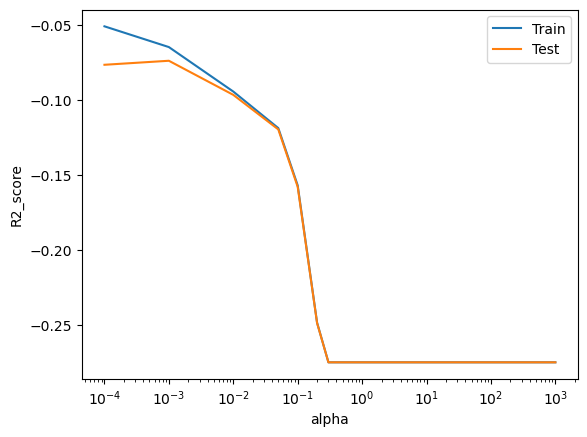

In [112]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [113]:
### Observation - As alpha increases, R2 Score decreases

### Comparing the Ridge and Lasso models

In [114]:
## Setting float display options
pd.options.display.float_format = "{:,.2f}".format

In [115]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.95              0.93
R2 Score (Test)               0.92              0.92
RSS (Train)                   5.95              8.10
RSS (Test)                    4.03              4.17
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.08              0.09
RMSE (Test)                   0.10              0.10

#### Observation - 
- Mean R2 score for test data is 0.94 for Ridge Regression and Lasso models.

In [116]:
#Creating empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, HouseStyle_2.5Fin, HouseStyle_2.5Unf, HouseStyle_2Story, HouseStyle_SFoyer, HouseStyle_SLvl, OverallQual_2, OverallQual_3, OverallQual_4, OverallQual_5, OverallQual_6, OverallQual_7, OverallQual_8, OverallQual_9, OverallQual_10, OverallCond_2, OverallCond_3, OverallCond_4, OverallCond_5, OverallCond_6, OverallCond_7, OverallCond_8, OverallCond_9, ...]

In [117]:
# Adding betas values in seperate columns for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [118]:
## View the betas/coefficients
betas 

Ridge  Lasso
MSSubClass_30          -0.03  -0.01
MSSubClass_40          -0.00   0.00
MSSubClass_45          -0.01  -0.00
MSSubClass_50          -0.00   0.00
MSSubClass_60          -0.01  -0.00
MSSubClass_70           0.04   0.04
MSSubClass_75           0.02   0.00
MSSubClass_80          -0.00   0.00
MSSubClass_85           0.00   0.00
MSSubClass_90          -0.03  -0.06
MSSubClass_120          0.02   0.02
MSSubClass_160         -0.04  -0.01
MSSubClass_180         -0.02  -0.00
MSSubClass_190         -0.01  -0.00
MSZoning_FV             0.05   0.02
MSZoning_RH             0.02   0.00
MSZoning_RL             0.04   0.02
MSZoning_RM            -0.01  -0.03
Street_Pave             0.02   0.00
Alley_None             -0.00  -0.00
Alley_Pave              0.01   0.00
LotShape_IR2            0.01   0.00
LotShape_IR3           -0.01  -0.00
LotShape_Reg            0.00  -0.00
LandContour_HLS        -0.01  -0.00
LandContour_Low        -0.01   0.00
LandContour_Lvl        -0.00  -0.00
Utilities_NoSeWa       -0.01  -0.00
LotConfig_CulDSac       0.03   0.02
LotConfig_FR2          -0.02  -0.00
LotConfig_FR3           0.00   0.00
LotConfig_Inside       -0.01  -0.00
LandSlope_Mod           0.01   0.00
LandSlope_Sev          -0.01  -0.00
Neighborhood_Blueste    0.00   0.00
Neighborhood_BrDale    -0.00  -0.00
Neighborhood_BrkSide    0.04   0.04
Neighborhood_ClearCr    0.03   0.02
Neighborhood_CollgCr   -0.02  -0.00
Neighborhood_Crawfor    0.10   0.11
Neighborhood_Edwards   -0.04  -0.02
Neighborhood_Gilbert   -0.02  -0.00
Neighborhood_IDOTRR    -0.02  -0.00
Neighborhood_MeadowV   -0.07  -0.04
Neighborhood_Mitchel   -0.02  -0.00
Neighborhood_NAmes     -0.03  -0.00
Neighborhood_NPkVill    0.01   0.00
Neighborhood_NWAmes    -0.02  -0.00
Neighborhood_NoRidge    0.02   0.00
Neighborhood_NridgHt    0.03   0.01
Neighborhood_OldTown   -0.02  -0.00
Neighborhood_SWISU      0.00   0.00
Neighborhood_Sawyer    -0.03  -0.00
Neighborhood_SawyerW   -0.01  -0.00
Neighborhood_Somerst    0.02   0.03
Neighborhood_StoneBr    0.03   0.00
Neighborhood_Timber     0.00   0.00
Neighborhood_Veenker    0.01   0.00
Condition1_Feedr        0.01   0.00
Condition1_Norm         0.04   0.03
Condition1_PosA        -0.00  -0.00
Condition1_PosN         0.05   0.00
Condition1_RRAe        -0.04  -0.00
Condition1_RRAn         0.01   0.00
Condition1_RRNe         0.00  -0.00
Condition1_RRNn         0.02   0.00
Condition2_Feedr       -0.01  -0.00
Condition2_Norm         0.01   0.00
Condition2_PosN         0.00   0.00
Condition2_RRAe         0.00   0.00
Condition2_RRAn         0.00   0.00
Condition2_RRNn         0.01   0.00
BldgType_2fmCon        -0.01  -0.00
BldgType_Duplex        -0.03  -0.00
BldgType_Twnhs         -0.04  -0.02
BldgType_TwnhsE         0.00   0.00
HouseStyle_1.5Unf       0.01   0.00
HouseStyle_1Story       0.01   0.00
HouseStyle_2.5Fin      -0.02  -0.00
HouseStyle_2.5Unf      -0.01  -0.00
HouseStyle_2Story      -0.01  -0.01
HouseStyle_SFoyer       0.01   0.00
HouseStyle_SLvl         0.00   0.00
OverallQual_2           0.00   0.00
OverallQual_3          -0.06  -0.04
OverallQual_4          -0.05  -0.04
OverallQual_5          -0.03  -0.02
OverallQual_6          -0.02  -0.00
OverallQual_7           0.02   0.04
OverallQual_8           0.07   0.10
OverallQual_9           0.08   0.13
OverallQual_10         -0.01   0.00
OverallCond_2          -0.01  -0.00
OverallCond_3          -0.05  -0.03
OverallCond_4          -0.07  -0.08
OverallCond_5          -0.02  -0.03
OverallCond_6           0.01   0.00
OverallCond_7           0.05   0.03
OverallCond_8           0.04   0.01
OverallCond_9           0.05   0.00
RoofStyle_Gable        -0.01  -0.00
RoofStyle_Gambrel      -0.01   0.00
RoofStyle_Hip           0.00   0.00
RoofStyle_Mansard       0.00  -0.00
RoofStyle_Shed          0.01   0.00
RoofMatl_Membran        0.02   0.00
RoofMatl_Metal          0.00   0.00
RoofMatl_Roll          -0.01  -0.00
RoofMatl_Tar&Grv       -0.02  -0.00
RoofMatl_WdShake        0.01   0.00
RoofMatl_WdShngl        0.0

In [119]:
# Features filtered by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

MSSubClass_30          -0.01
MSSubClass_70           0.04
MSSubClass_90          -0.06
MSSubClass_120          0.02
MSSubClass_160         -0.01
MSZoning_FV             0.02
MSZoning_RL             0.02
MSZoning_RM            -0.03
LotShape_Reg           -0.00
LotConfig_CulDSac       0.02
Neighborhood_BrkSide    0.04
Neighborhood_ClearCr    0.02
Neighborhood_Crawfor    0.11
Neighborhood_Edwards   -0.02
Neighborhood_MeadowV   -0.04
Neighborhood_NridgHt    0.01
Neighborhood_Somerst    0.03
Condition1_Norm         0.03
BldgType_Twnhs         -0.02
HouseStyle_2Story      -0.01
OverallQual_3          -0.04
OverallQual_4          -0.04
OverallQual_5          -0.02
OverallQual_7           0.04
OverallQual_8           0.10
OverallQual_9           0.13
OverallCond_3          -0.03
OverallCond_4          -0.08
OverallCond_5          -0.03
OverallCond_7           0.03
OverallCond_8           0.01
Exterior1st_BrkFace     0.03
Exterior1st_HdBoard    -0.01
Exterior2nd_Plywood    -0.00
MasVnrType_Sto

### Top 10 coefficients 

In [120]:
# Top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor   0.10
OverallQual_9          0.08
OverallQual_8          0.07
SaleCondition_Normal   0.06
Functional_Typ         0.06
GrLivArea              0.06
2ndFlrSF               0.05
OverallCond_9          0.05
OverallCond_7          0.05
MSZoning_FV            0.05
Name: Ridge, dtype: float64

In [121]:
# Taking inverse log for target variables
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

Neighborhood_Crawfor   1.10
OverallQual_9          1.08
OverallQual_8          1.07
SaleCondition_Normal   1.06
Functional_Typ         1.06
GrLivArea              1.06
2ndFlrSF               1.05
OverallCond_9          1.05
OverallCond_7          1.05
MSZoning_FV            1.05
Name: Ridge, dtype: float64

In [122]:
# Top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.13
Neighborhood_Crawfor   0.11
OverallQual_8          0.10
GrLivArea              0.09
Functional_Typ         0.06
SaleType_New           0.06
SaleCondition_Normal   0.05
TotalBsmtSF            0.04
MSSubClass_70          0.04
BsmtExposure_Gd        0.04
Name: Lasso, dtype: float64

In [123]:
# Taking inverse log for target variables
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.13
Neighborhood_Crawfor   1.12
OverallQual_8          1.11
GrLivArea              1.10
Functional_Typ         1.06
SaleType_New           1.06
SaleCondition_Normal   1.05
TotalBsmtSF            1.04
MSSubClass_70          1.04
BsmtExposure_Gd        1.04
Name: Lasso, dtype: float64

## Question 1
#### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


### Answer - 

Top 10 variables are - 
 
- OverallQual_9          
- Neighborhood_Crawfor   
- OverallQual_8          
- GrLivArea             
- Functional_Typ        
- SaleType_New           
- SaleCondition_Normal   
- TotalBsmtSF          
- MSSubClass_70          
- BsmtExposure_Gd             


#### Optimal value of lambda for Ridge Regression = 9
#### Optimal value of lambda for Lasso = 0.001
#### Ridge at alpha = 9
- R2 Score (Train) = 0.95
- R2 Score (Test) = 0.92

#### Lasso at alpha = 0.001
- R2 Score (Train) = 0.93
- R2 Score (Test) = 0.92






In [124]:
# Double the value of alpha for both ridge and lasso 

# Ridge Regression model fror alpha = 18

ridge = Ridge(alpha=18)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=18)

In [125]:
# Ridge regression coefficient
ridge.coef_

array([-2.91341136e-02, -8.76401300e-05, -2.02108256e-03,  5.91251635e-04,
       -6.33965496e-03,  3.83984799e-02,  1.01333189e-02, -2.16368698e-03,
        5.76955929e-03, -2.58458231e-02,  1.99632629e-02, -3.53087091e-02,
       -1.57255797e-02, -1.10270423e-02,  3.51721897e-02,  7.77870503e-03,
        2.93630437e-02, -2.08349114e-02,  1.15847272e-02, -2.78001197e-03,
        9.74266354e-03,  8.21345503e-03, -4.53586757e-03, -1.61450039e-03,
       -3.37859135e-03, -3.82386262e-03, -2.08620119e-03, -6.54410607e-03,
        2.54831538e-02, -1.05797648e-02,  2.46581023e-03, -5.25847651e-03,
        1.03960774e-02, -8.83554000e-03,  1.88686867e-03, -2.20188096e-03,
        3.41200038e-02,  2.32778021e-02, -1.74416118e-02,  7.68333845e-02,
       -3.88248866e-02, -1.60924113e-02, -1.88108300e-02, -4.71234956e-02,
       -1.70262672e-02, -2.28092881e-02,  5.85920671e-03, -1.26840660e-02,
        1.64589251e-02,  2.27975817e-02, -1.86993605e-02,  2.05338044e-03,
       -2.54474344e-02, -

In [126]:
# Predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [127]:
# Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.92
RSS (Train) = 6.61
RSS (Test) = 4.08
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.10


In [128]:
# Lasso Regression model fror alpha = 0.002

lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [129]:
# Predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [130]:
# Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
RSS (Train) = 10.07
RSS (Test) = 4.90
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.11


In [131]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.94              0.91
R2 Score (Test)               0.92              0.91
RSS (Train)                   6.61             10.07
RSS (Test)                    4.08              4.90
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.08              0.10
RMSE (Test)                   0.10              0.11

## Observations - 
#### Ridge R2 score at alpha = 9 
- R2 Score (Train) = 0.95
- R2 Score (Test)	 = 0.92

#### Ridge R2 score at alpha  = 18 
- R2 Score (Train) = 0.94	
- R2 Score (Test)  = 0.92	

#### Lasso R2 score at alpha  = 0.001
- R2 Score (Train) = 0.93
- R2 Score (Test)  = 0.92

#### Lasso R2 score at alpha = 0.002
- R2 Score (Train) = 0.91
- R2 Score (Test)  = 0.91




In [132]:
#Creating empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, HouseStyle_2.5Fin, HouseStyle_2.5Unf, HouseStyle_2Story, HouseStyle_SFoyer, HouseStyle_SLvl, OverallQual_2, OverallQual_3, OverallQual_4, OverallQual_5, OverallQual_6, OverallQual_7, OverallQual_8, OverallQual_9, OverallQual_10, OverallCond_2, OverallCond_3, OverallCond_4, OverallCond_5, OverallCond_6, OverallCond_7, OverallCond_8, OverallCond_9, ...]

In [133]:
# Adding betas values in seperate columns for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [134]:
# Features filtered by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

MSSubClass_70           0.02
MSSubClass_90          -0.04
MSSubClass_120          0.00
MSZoning_RM            -0.04
LotShape_Reg           -0.00
Neighborhood_BrkSide    0.01
Neighborhood_Crawfor    0.09
Neighborhood_Edwards   -0.02
Neighborhood_Somerst    0.01
Condition1_Norm         0.02
BldgType_Duplex        -0.00
OverallQual_4          -0.03
OverallQual_5          -0.01
OverallQual_7           0.03
OverallQual_8           0.08
OverallQual_9           0.07
OverallCond_4          -0.06
OverallCond_5          -0.02
OverallCond_7           0.03
Exterior1st_BrkFace     0.00
Exterior1st_HdBoard    -0.00
ExterQual_TA           -0.02
Foundation_CBlock      -0.01
Foundation_PConc        0.01
BsmtCond_TA             0.01
BsmtExposure_Gd         0.03
BsmtFinType1_GLQ        0.02
HeatingQC_TA           -0.02
CentralAir_Y            0.01
KitchenQual_TA         -0.00
Functional_Typ          0.06
FireplaceQu_Gd          0.02
GarageType_Attchd       0.02
GarageFinish_Unf       -0.00
PavedDrive_Y  

#### New Top10 variables

In [135]:
# Top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

Neighborhood_Crawfor   0.08
OverallQual_8          0.06
OverallQual_9          0.06
GrLivArea              0.06
SaleCondition_Normal   0.05
Functional_Typ         0.05
OverallCond_7          0.05
2ndFlrSF               0.04
TotalBsmtSF            0.04
BsmtExposure_Gd        0.04
Name: Ridge, dtype: float64

In [136]:
# Taking inverse log for target variables
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

Neighborhood_Crawfor   1.08
OverallQual_8          1.06
OverallQual_9          1.06
GrLivArea              1.06
SaleCondition_Normal   1.05
Functional_Typ         1.05
OverallCond_7          1.05
2ndFlrSF               1.05
TotalBsmtSF            1.04
BsmtExposure_Gd        1.04
Name: Ridge, dtype: float64

In [137]:
# Top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.10
Neighborhood_Crawfor   0.09
OverallQual_8          0.08
OverallQual_9          0.07
Functional_Typ         0.06
TotalBsmtSF            0.05
YearRemodAdd           0.04
SaleType_New           0.03
OverallCond_7          0.03
SaleCondition_Normal   0.03
Name: Lasso, dtype: float64

In [138]:
# Taking inverse log for target variables
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.11
Neighborhood_Crawfor   1.09
OverallQual_8          1.08
OverallQual_9          1.07
Functional_Typ         1.06
TotalBsmtSF            1.05
YearRemodAdd           1.04
SaleType_New           1.03
OverallCond_7          1.03
SaleCondition_Normal   1.03
Name: Lasso, dtype: float64

### Observation 
#### Top 10 variables after double alpha values for Ridge and lasso regression

- GrLivArea              
- Neighborhood_Crawfor   
- OverallQual_8         
- OverallQual_9         
- Functional_Typ        
- SaleCondition_Normal   
- OverallCond_7          
- TotalBsmtSF          
- BsmtExposure_Gd
- 2ndFlrSF  


## Question 2
#### You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?


### Answer-
- Depends on use case -

- case 1 
- Lasso regression will perform better - number of predictor variables are significant are less
- Lasso regression able to shrink insignificant variables completely to zero and remove them from the model.

- case 2 
- Ridge regression will perform better -  number of predictor variables are significant are more and their coefficients are roughly equal.
- Ridge regression perform better because it keeps all of the predictors in the model.





## Question 3
#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


### Answer 

In [139]:
# Lets drop the five most important predictor variables in the lasso model.

top_5 = ['OverallQual_9', 'Neighborhood_Crawfor', 'GrLivArea', 'OverallCond_9', 'OverallQual_8']

X_train_dropped = X_train.drop(top_5, axis=1)
X_test_dropped = X_test.drop(top_5, axis=1)

In [140]:
# Re-Building Lasso Regression model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [141]:
# Value of alpha
lassoCV.best_params_

{'alpha': 0.001}

### We got alpha value as 0.001, Rebuilding Lasso Regression model for alpha 0.001.

In [142]:
lasso = Lasso(alpha=0.001)

In [143]:
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [144]:
# Predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [145]:
# Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.92
RSS (Train) = 8.86
RSS (Test) = 4.35
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [146]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

Lasso Regression
Metric                            
R2 Score (Train)              0.92
R2 Score (Test)               0.92
RSS (Train)                   8.86
RSS (Test)                    4.35
MSE (Train)                   0.01
MSE (Test)                    0.01
RMSE (Train)                  0.09
RMSE (Test)                   0.10

In [147]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

Empty DataFrame
Columns: []
Index: [MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, HouseStyle_2.5Fin, HouseStyle_2.5Unf, HouseStyle_2Story, HouseStyle_SFoyer, HouseStyle_SLvl, OverallQual_2, OverallQual_3, OverallQual_4, OverallQual_5, OverallQual_6, OverallQual_7, OverallQual_10, OverallCond_2, OverallCond_3, OverallCond_4, OverallCond_5, OverallCond_6, OverallCond_7, OverallCond_8, RoofStyle_Gable, RoofStyle_Gambrel, RoofStyle_Hip, RoofStyle_Mansard, ...]

In [148]:
betas['Lasso'] = lasso.coef_

In [149]:
# Top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF         0.11
1stFlrSF         0.08
MSSubClass_70    0.07
Functional_Typ   0.07
SaleType_New     0.05
Name: Lasso, dtype: float64

In [150]:
# Taking inverse log for target variables
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:5]

2ndFlrSF         1.11
1stFlrSF         1.08
MSSubClass_70    1.07
Functional_Typ   1.07
SaleType_New     1.05
Name: Lasso, dtype: float64

### New Top 5 Predictors
- 2ndFlrSF        
- 1stFlrSF         
- MSSubClass_70    
- Functional_Typ  
- SaleType_New     

## Question 4
#### How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?


### Answer - 
#### How can you make sure that a model is robust and generalisable?
- 1) Model should not be impacted by outliers in the training data.
- 2) The test accuracy is greater than the training score
- 3) The model should be accurate for new Test datasets other than the ones which were used during modeling.

#### The implications of the same for the accuracy of the model and why?
- 1) Outlier treatment should be done in traning. This will increase the accuracy of the predictions made by the model
- 2) Confidence intervals can be used which will standardize the predictions made by the model. 


 